In [1]:
import stanza
import gensim
from gensim import interfaces, utils
import pandas as pd
import texthero as hero
from texthero import preprocessing
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from pprint import pprint
import logging
import texthero as hero
from texthero import preprocessing
import pandas as pd
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
import warnings
warnings.filterwarnings("ignore")
import csv
csv.field_size_limit()
131072
csv.field_size_limit(256 << 10)
131072
csv.field_size_limit()
262144
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Make your stopwords
stopwords_portuguese = re.split('\s+', 'a, agora, ainda, alguém, algum, alguma, algumas, alguns, ampla, amplas, amplo, amplos, ante, antes, ao, aos, após, aquela, aquelas, aquele, aqueles, aquilo, as, até, através, cada, coisa, coisas, com, como, contra, contudo, da, daquele, daqueles, das, de, dela, delas, dele, deles, depois, dessa, dessas, desse, desses, desta, destas, deste, deste, destes, deve, devem, devendo, dever, deverá, deverão, deveria, deveriam, devia, deviam, disse, disso, disto, dito, diz, dizem, do, dos, e, é, ela, elas, ele, eles, em, enquanto, entre, era, essa, essas, esse, esses, esta, está, estamos, estão, estas, estava, estavam, estávamos, este, estes, estou, eu, fazendo, fazer, feita, feitas, feito, feitos, foi, for, foram, fosse, fossem, grande, grandes, há, isso, isto, já, la, lá, lhe, lhes, lo, mas, me, mesma, mesmas, mesmo, mesmos, meu, meus, minha, minhas, muita, muitas, muito, muitos, na, não, nas, nem, nenhum, nessa, nessas, nesta, nestas, ninguém, no, nos, nós, nossa, nossas, nosso, nossos, num, numa, nunca, o, os, ou, outra, outras, outro, outros, para, pela, pelas, pelo, pelos, pequena, pequenas, pequeno, pequenos, per, perante, pode, pude, podendo, poder, poderia, poderiam, podia, podiam, pois, por, porém, porque, posso, pouca, poucas, pouco, poucos, primeiro, primeiros, própria, próprias, próprio, próprios, quais, qual, quando, quanto, quantos, que, quem, são, se, seja, sejam, sem, sempre, sendo, será, serão, seu, seus, si, sido, só, sob, sobre, sua, suas, talvez, também, tampouco, te, tem, tendo, tenha, ter, teu, teus, ti, tido, tinha, tinham, toda, todas, todavia, todo, todos, tu, tua, tuas, tudo, última, últimas, último, últimos, um, uma, umas, uns, vendo, ver, vez, vindo, vir, vos, vós, *, -, sp, av, r, ii')

newlist = []
for n in stopwords_portuguese:
    newlist.append(n.replace(",", ''))
stopwords_portuguese = newlist

filename = 'C:/Users/user/1.IRONHACK/stopwords.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1,
                  encoding='utf-8', dtype=str)
new_stop = data.tolist()
joined_stop = new_stop + stopwords_portuguese
joined_stop = [x.strip(' ') for x in joined_stop]
#nltk.download('stopwords')
stop_words = stopwords.words('portuguese')
stop_words.extend([joined_stop, 'segunda', 'terça', 'quarta','quinta', 'internos',
                   'sexta', 'sabado', 'domingo', 'feira','sao', 'paulo', 'eu','elas',
                   'secretaria', 'municipio', 'prefeitura', 'sr', 'sra', 'nos',
                   'no', 'na', 'local', 'despacho', 'despachos', 'gabinete', 'nós',
                   'cidade', 'reuniao', 'agenda', 'gabinete', 'ele', 'ela', 'eles'])

In [2]:
# Load file
df = pd.read_csv("C:/Users/user/Documents/1. GitHub/Project 8 - Capricho/capricho_filter_full.csv")
#Preprocess: Remove urls
df['full'] = df['full'].str.replace('http\S+|www.\S+', '', case=False)
#Preprocess: Remove /n
df['full']= df['full'].replace('\n',' ')
# Remove column
df.drop('Unnamed: 0',
  axis='columns', inplace=True)
# Rename link column
df.rename(columns={"0": "link"}, inplace=True)


# Preprocess automate Hero with no Lem
# create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                , preprocessing.lowercase
                , preprocessing.remove_punctuation
                , preprocessing.remove_digits
                , preprocessing.remove_diacritics
                #, preprocessing.remove_stopwords
                , preprocessing.remove_whitespace
                #, preprocessing.stem]
               ]
# Clean numbers and dates
df['clean_title'] = df['full'].apply(lambda x: re.sub('\d{1,2}h\d\d', '', x))
df['clean_title']= df['clean_title'].str.replace(r'\d+','')
# pass the custom_pipeline to the pipeline argument
df['clean_title'] = hero.clean(df['clean_title'], pipeline=custom_pipeline)
# Erase stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
df.head()

# Extract your train variable from table
train_text = df['clean_title']
train_text.head()

# Clean NaNs
df = df.dropna()
# Save table
df.to_csv("C:/Users/user/Documents/1. GitHub/Project 8 - Capricho/capricho_filter_full_clean.csv", index=False)
allDone()

In [3]:
df

link      news_id  \
0      https://capricho.abril.com.br/comportamento/ho...  post-517938   
1      https://capricho.abril.com.br/entretenimento/d...  post-518557   
2      https://capricho.abril.com.br/entretenimento/n...  post-518551   
3      https://capricho.abril.com.br/comportamento/te...  post-360633   
4      https://capricho.abril.com.br/comportamento/7-...  post-121732   
...                                                  ...          ...   
35886  https://capricho.abril.com.br/moda/emma-watson...   post-27697   
35887  https://capricho.abril.com.br/moda/emma-watson...   post-28079   
35888  https://capricho.abril.com.br/entretenimento/r...   post-28180   
35889  https://capricho.abril.com.br/entretenimento/l...   post-61727   
35890  https://capricho.abril.com.br/moda/os-vestidos...   post-66864   

                                                    date  \
0      Atualizado em 10 jun 2021, 15h15 - Publicado e...   
1                                     12 jun 2021, 18h21   
2      Atualizado em 12 jun 2021, 20h19 - Publicado e...   
3      Atualizado em 11 jun 2021, 18h07 - Publicado e...   
4      Atualizado em 11 jun 2021, 15h38 - Publicado e...   
...                                                  ...   
35886  Atualizado em 24 ago 2016, 21h15 - Publicado e...   
35887  Atualizado em 24 ago 2016, 21h15 - Publicado e...   
35888  Atualizado em 17 ago 2016, 08h45 - Publicado e...   
35889  Atualizado em 16 jan 2021, 17h33 - Publicado e...   
35890  Atualizado em 13 mar 2018, 17h56 - Publicado e...   

                                                  author  \
0                                              Personare   
1                                     12 jun 2021, 18h21   
2      Atualizado em 12 jun 2021, 20h19 - Publicado e...   
3                                        Amanda Oliveira   
4                                             Da Redação   
...                                                  ...   
35886                                         Da Redação   
35887                                         Da Redação   
35888                                         Da Redação   
35889                                         Da Redação   
35890                                         Da Redação   

                                                   title  \
0      Horóscopo do dia: a previsão para os signos ho...   
1      Dia dos Namorados: 8 filmes românticos para vo...   
2      No Dia dos Namorados, Manu Gavassi assume rela...   
3            Teste: Você está mesmo pronta para namorar?   
4      7 coisas que acontecem com o seu corpo quando ...   
...                                                  ...   
35886                Emma Watson é capa da revista Crash   
35887            Emma Watson é capa da revista Interview   
35888           Rupert Grint é um menino mau, muito mau!   
35889              Laura diz adeus ao Temporada de Moda!   
35890  Os vestidos de noiva de Serena e da Blair em G...   

                                                subtitle  \
0      Alô, você de Touro! Cuidado com o que anda com...   
1      Uma lista que vai aquecer o seu coração com mu...   
2      A cantora utilizou as redes sociais para publi...   
3      Será que você está preparada para um relaciona...   
4      Sabia que, para a ciência, você se torna uma v...   
...                                                  ...   
35886                   Atriz encara ensaio fashionista!   
35887                             Atriz está super fofa!   
35888  É claro que "Harry Potter" marcou a vida de Ru...   
35889                                                  .   
35890  Serena van der Woodsen e Blair Waldorf usam ve...   

                                                    text  \
0      ['', 'A tensão Lua-Plutão no eixo família-trab...   
1      ['O amor está no ar! Neste sábado (12/6), esta...   
2      ['Novo casal na área! Manu Gavassi aproveitou ...   
3      ['Sabe quando todas as suas amigas começam a

In [4]:
import gensim
import pyLDAvis.sklearn
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from gensim import corpora, models
import gensim
import os
from os import path
from time import sleep
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from pprint import pprint
import logging
import texthero as hero
from texthero import preprocessing
import pandas as pd
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
import warnings
warnings.filterwarnings("ignore")
import csv
csv.field_size_limit()
131072
csv.field_size_limit(256 << 10)
131072
csv.field_size_limit()
262144
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import LdaModel
from pprint import pprint
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import numpy as np
import gensim
import matplotlib.pyplot as plt
import operator
import re
import os
from IPython.core.display import display, HTML
import warnings
#import pyLDAvis.gensim_models
import pyLDAvis
#import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import gensim.downloader as api

In [20]:
#%%Def function
def vis(x):
    #Load file
    df = pd.read_csv('C:/Users/user/Documents/1. GitHub/Project 8 - Capricho/'+str(x)+'.csv')
    df = df.dropna()
    train_text = df['clean_title']
    # Create tokens
    df.dropna()
    tokenized_sentences = [p.lower().split() for p in train_text]
    # tokenized_sentences
    id2word = gensim.corpora.Dictionary(tokenized_sentences)
    texts = tokenized_sentences
    corpus = [id2word.doc2bow(text) for text in texts]
    # print(texts[:1])
    # train_text[300]
    # id2word[16]

    # Tf-iDf
    #tfidf = TfidfModel(corpus, id2word)
    #
    #low_value = 0.9
    #low_value_words = []
    #for bow in corpus:
    #    low_value_words += [id for id, value in tfidf[bow] if value < low_value]
    #
    #id2word.filter_tokens(bad_ids=low_value_words)
    #
    #new_corpus = [id2word.doc2bow(text) for text in texts]
    #
    #new_corpus
    #
    #
    # Create Model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=30,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    print('show txt trained 7', train_text[7])
    lda_model.save('lda.model'+str(x))

    # Create Model_suggestion_by_gensim
    #num_topics = 30
    #chunksize = 2000
    #passes = 20
    #iterations = 400
    #eval_every = None
    #
    #lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
    #                                            id2word=id2word,
    #                                            chunksize=chunksize,
    #                                            alpha='auto',
    #                                            eta='auto',
    #                                            iterations=iterations,
    #                                            num_topics=num_topics,
    #                                            passes=passes,
    #                                            eval_every=eval_every)
    #
    #train_text[7]
    #
    print('show topics', lda_model.show_topics())
    print('print topic 2', lda_model.print_topics()[2])
    doc_lda = lda_model[corpus]
    my_model = lda_model[corpus]

    print('print topics', lda_model.print_topics())

    # LDA Graphs
        # WordClouds
    for t in range(lda_model.num_topics):
        plt.figure(figsize=(20,10))
        #print(dict(lda_model.show_topic(t, 30))
        plt.imshow(WordCloud(width=1600, height=800).fit_words(dict(lda_model.show_topic(t, 30)))) #, facecolor='k')  if want to strip from borders
        plt.axis("off")
        plt.title("Topic #" + str(t))
        plt.tight_layout(pad=0)
        plt.savefig(str(x)+str(t)+'.png', dpi=300)
        plt.show()
        plt.clf()

        # pyLDAvis
    display(HTML("<style>.container { max-width:100% !important; }</style>"))
    display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
    display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
    display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

    #matplotlib inline
    visu = pyLDAvis.gensim.prepare(
        topic_model=lda_model, corpus=corpus, dictionary=id2word, mds='mmds')
    pyLDAvis.enable_notebook(local=True)
    pyLDAvis.save_html(visu, str(x)+'.html')
    allDone()
    return None


show txt trained 7 melhores declaracoes amor series filmesno dia namorados relembre cenas romanticas telinha algumas cenas romanticas filmes series ficam guardadas ficam guardadas memoria pedidos namoro casamento declaracoes amor posto voce ate chegou suspirar nesse dia namorados melhores momentos casais filmes series xahow i met your mother barney neil patrick harris faz mega plano pedir robin cobie smulders casamento poderia simplesmente ter ajoelhado dado alianca sim todos truques manipular filmar robin realmente pegaram surpresa nao nao suspirar beijo aceita xa n certeza filme romance classico nao poderia ficar lista casal kat julia stiles patrick heath ledger nao suportam inicio filme ate odio jovem transforma amor profundo "mas tudo odeio fato nao conseguir odiar pouquinho segundo" nao chora nessa parte tambem filme amor simon xa simon nick robinson declara blue keiynan lonsdale blog diz aguardando roda gigante escola inteira assistindo blue verdade bram amigos conhecidos simon v

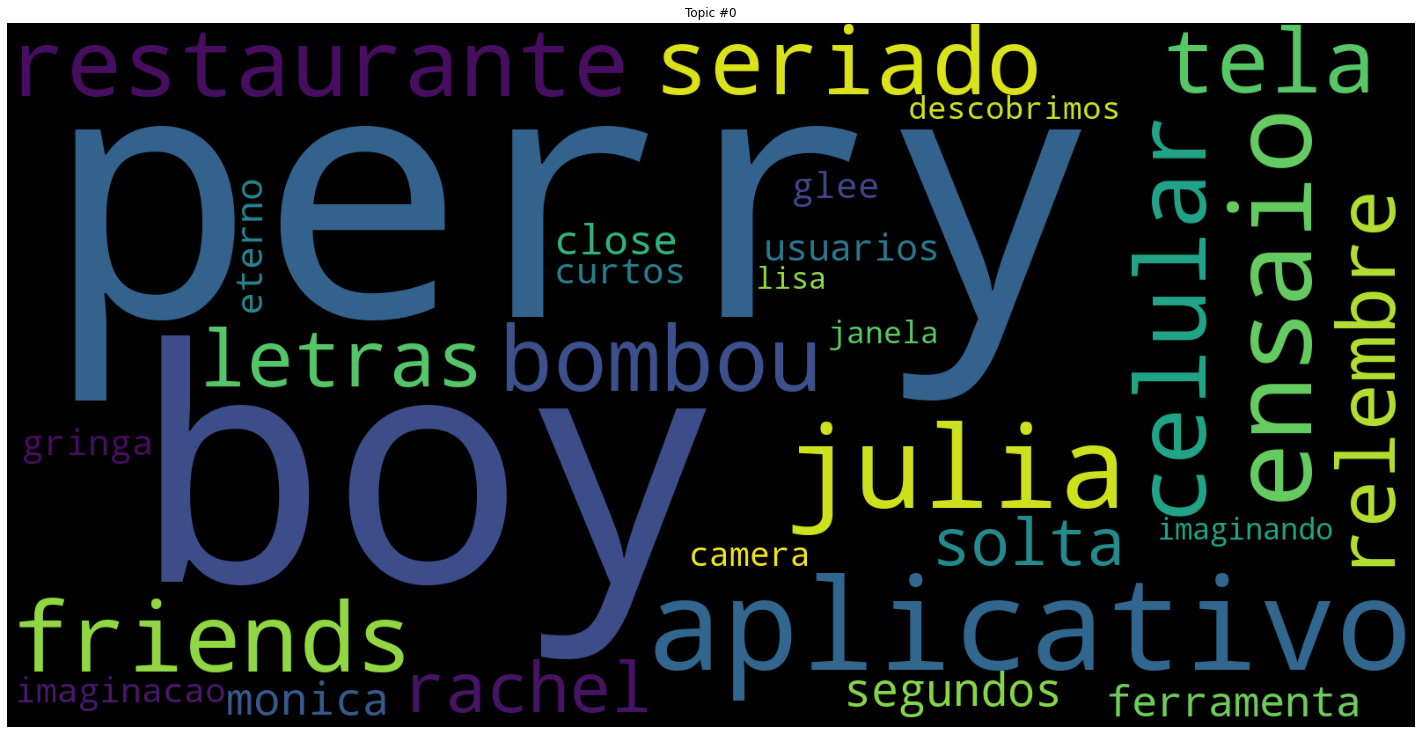

<Figure size 432x288 with 0 Axes>

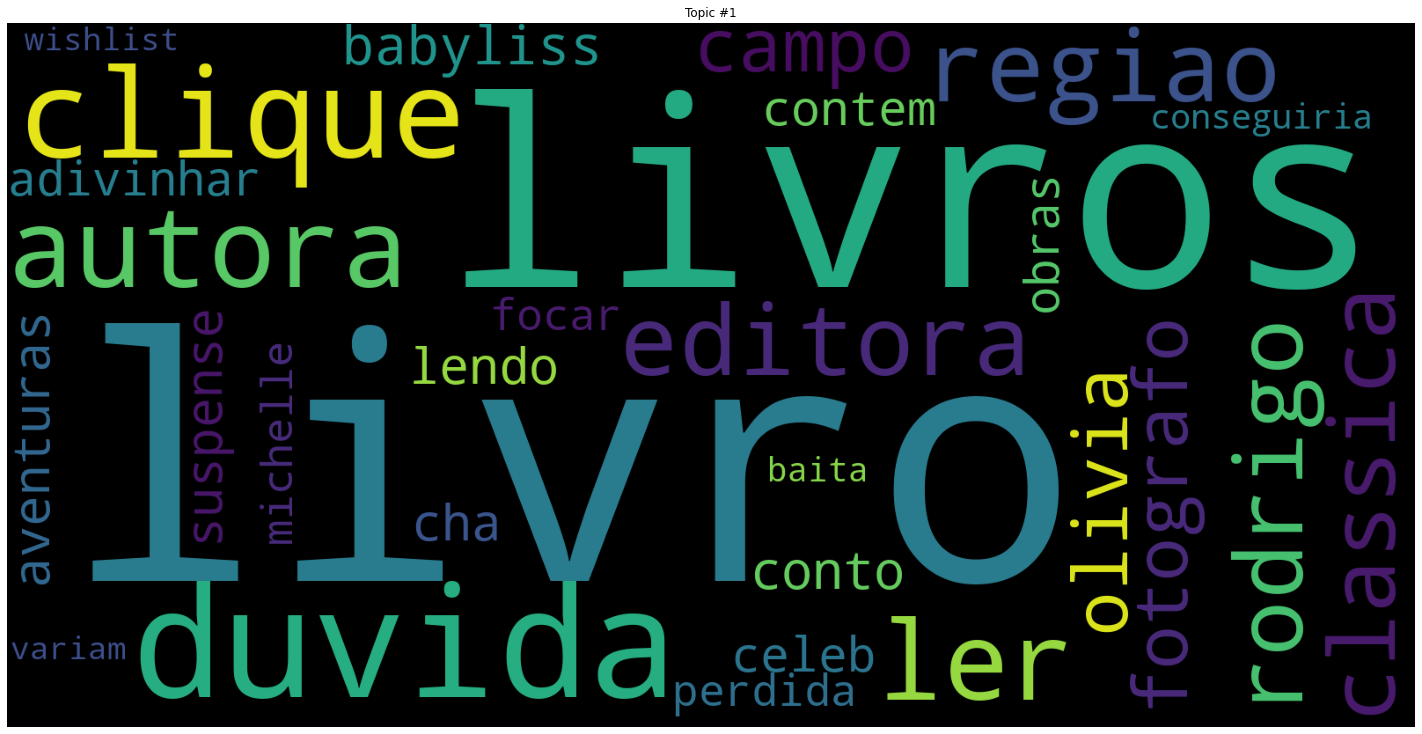

<Figure size 432x288 with 0 Axes>

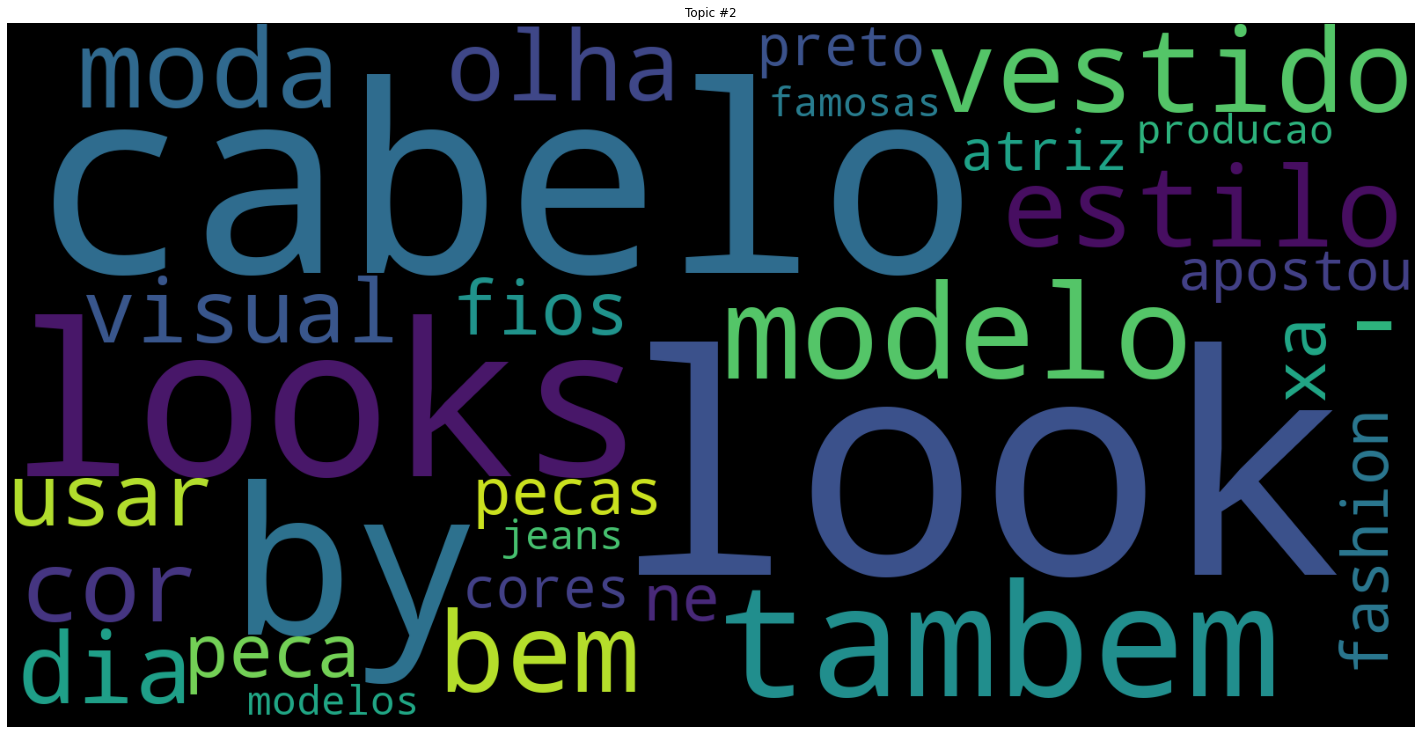

<Figure size 432x288 with 0 Axes>

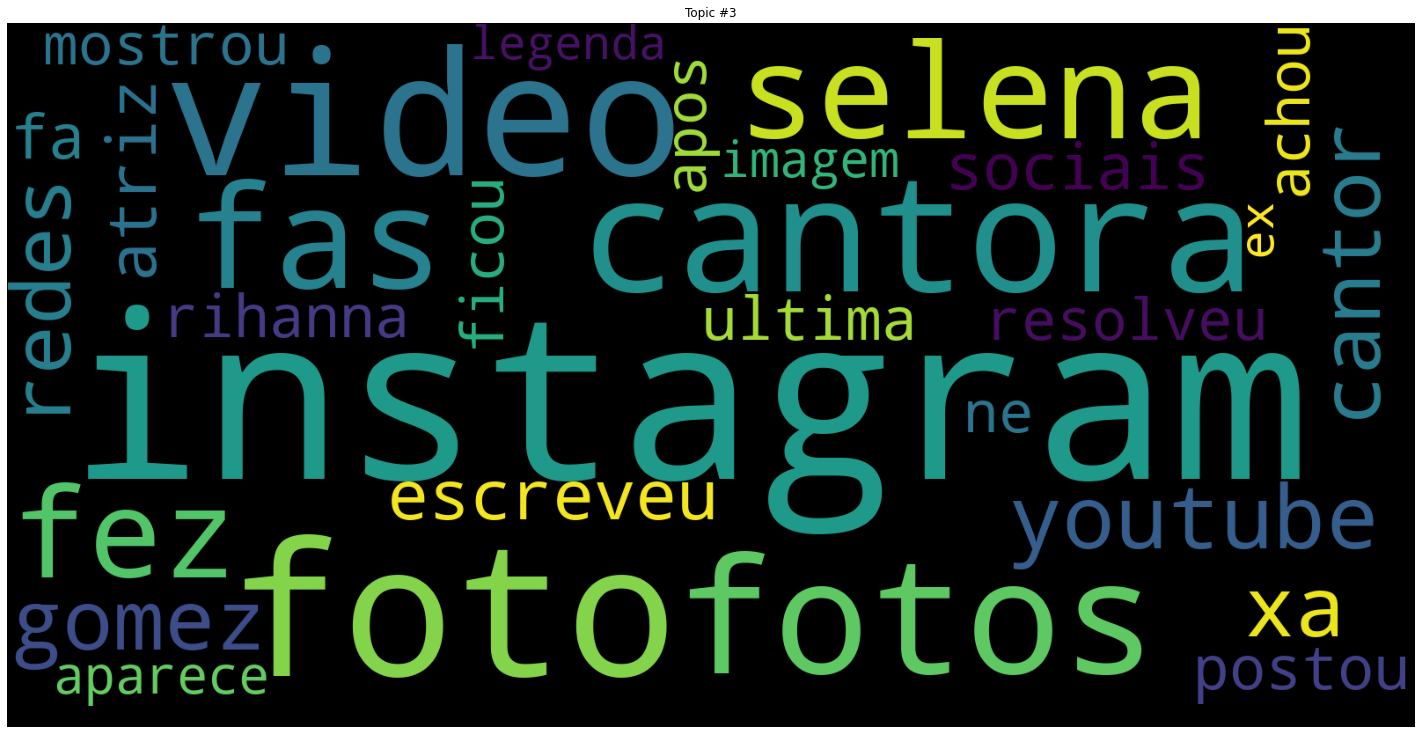

<Figure size 432x288 with 0 Axes>

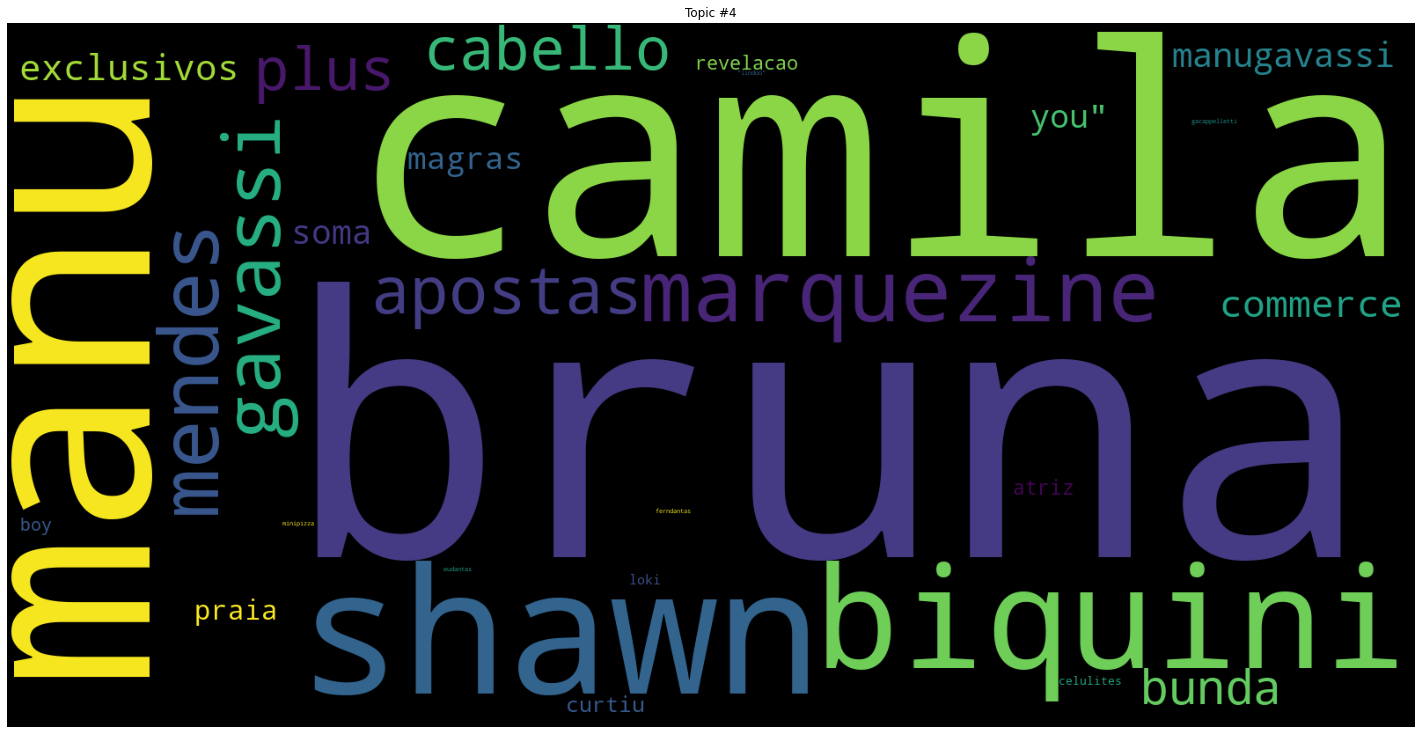

<Figure size 432x288 with 0 Axes>

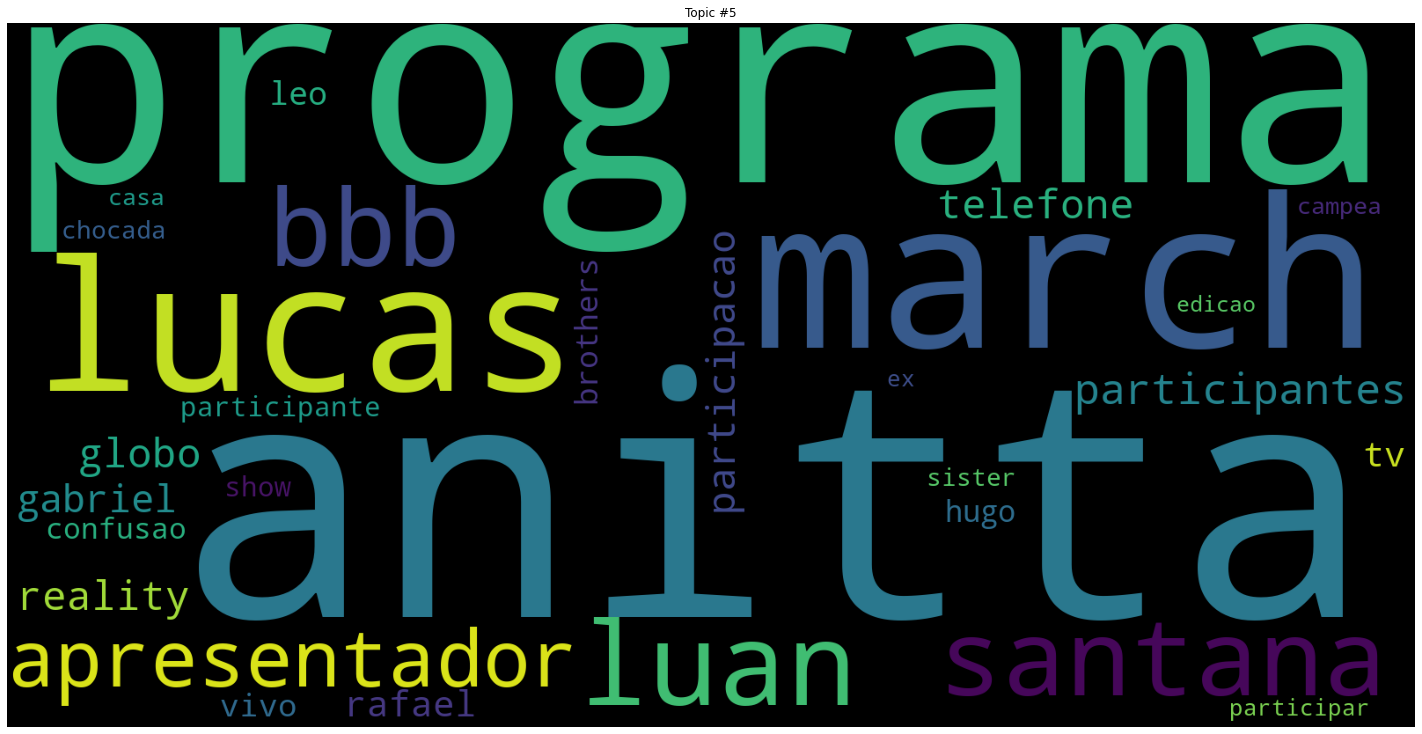

<Figure size 432x288 with 0 Axes>

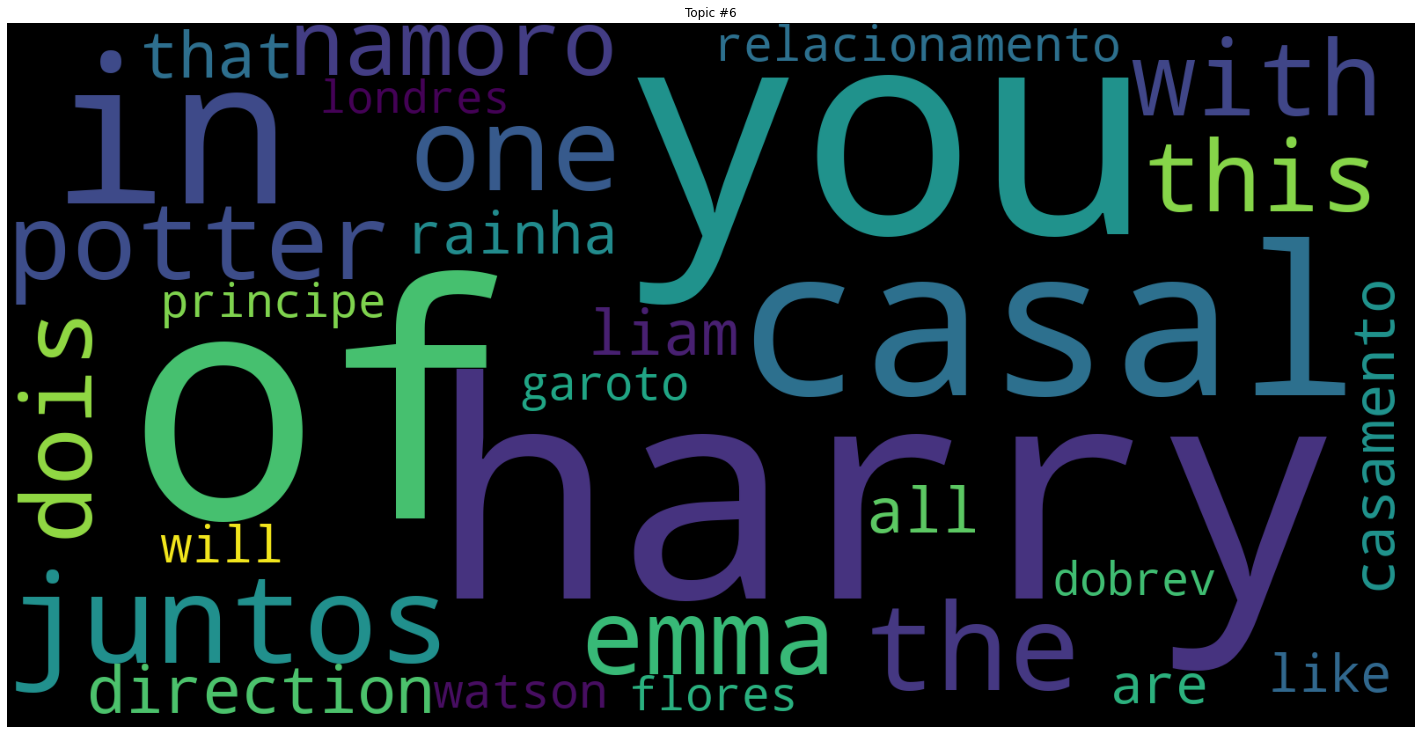

<Figure size 432x288 with 0 Axes>

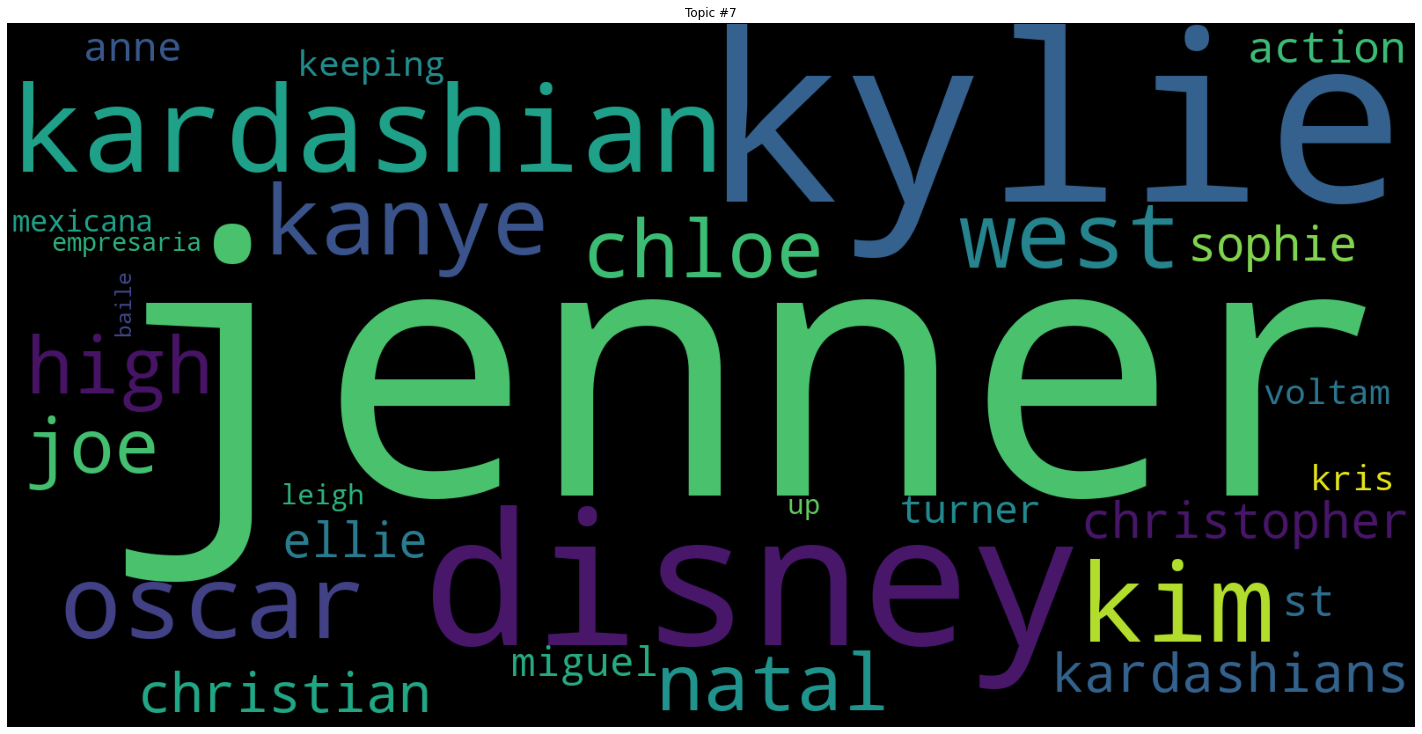

<Figure size 432x288 with 0 Axes>

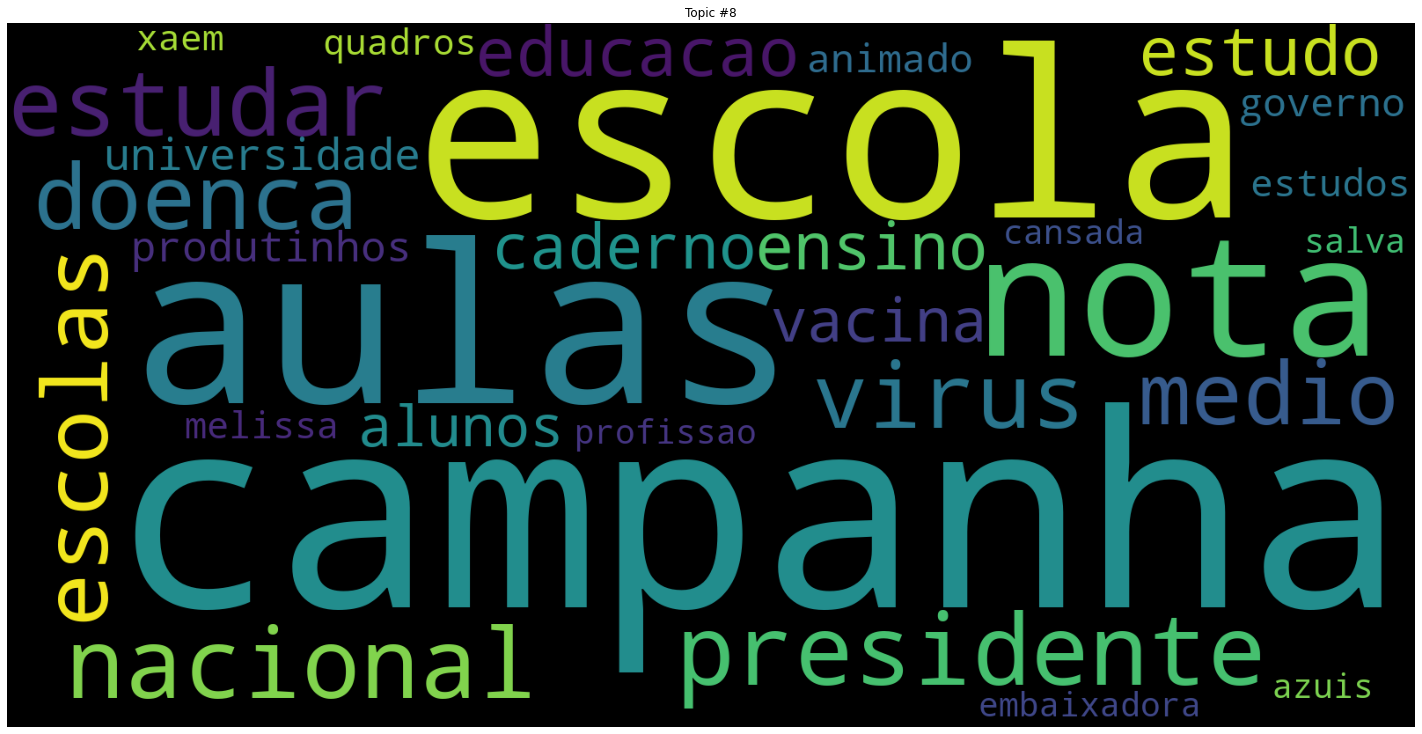

<Figure size 432x288 with 0 Axes>

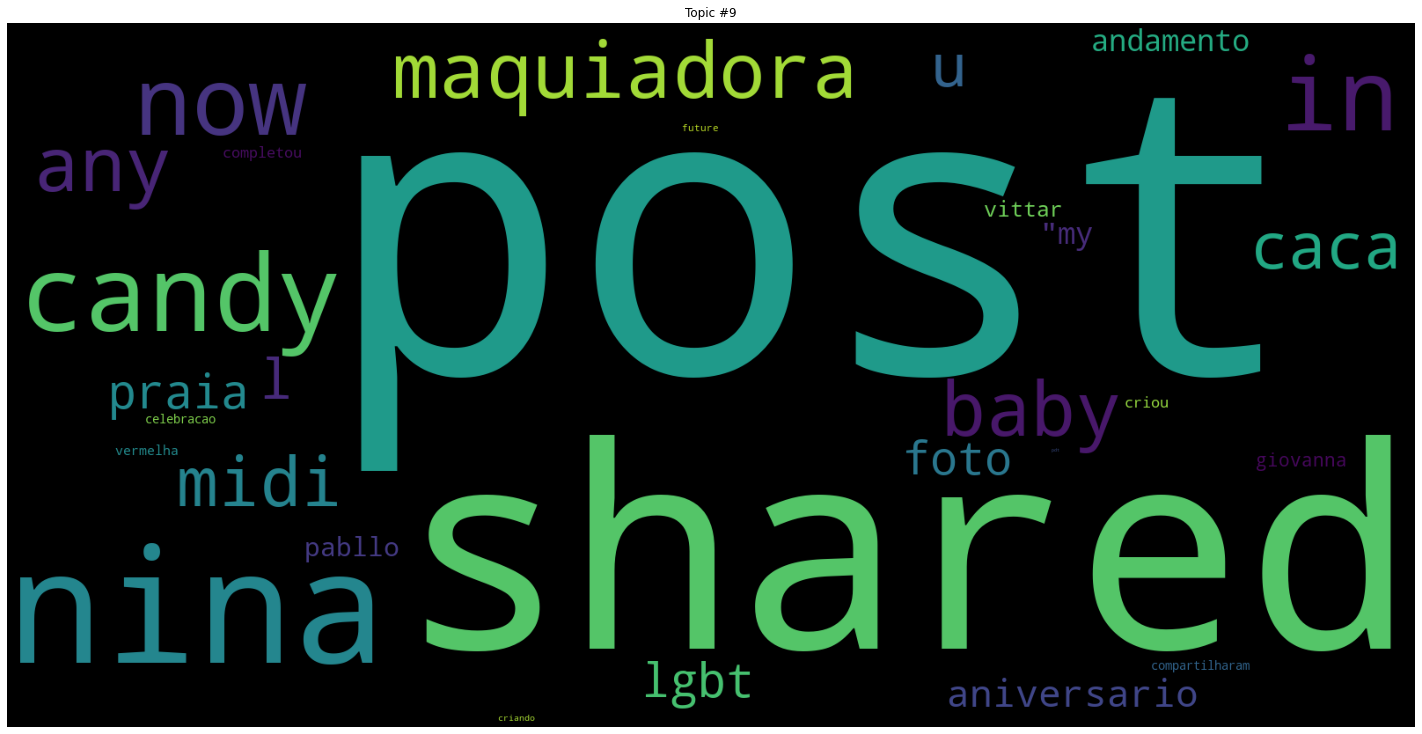

<Figure size 432x288 with 0 Axes>

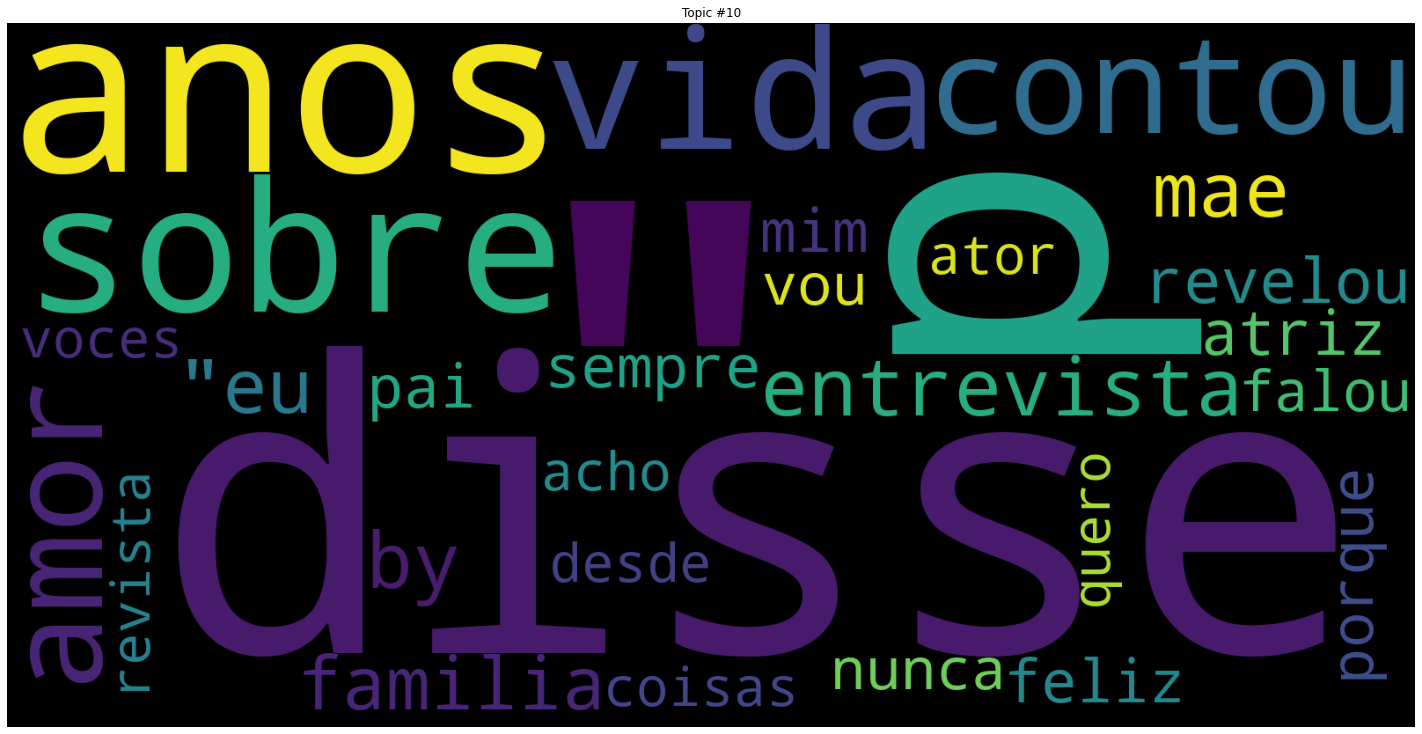

<Figure size 432x288 with 0 Axes>

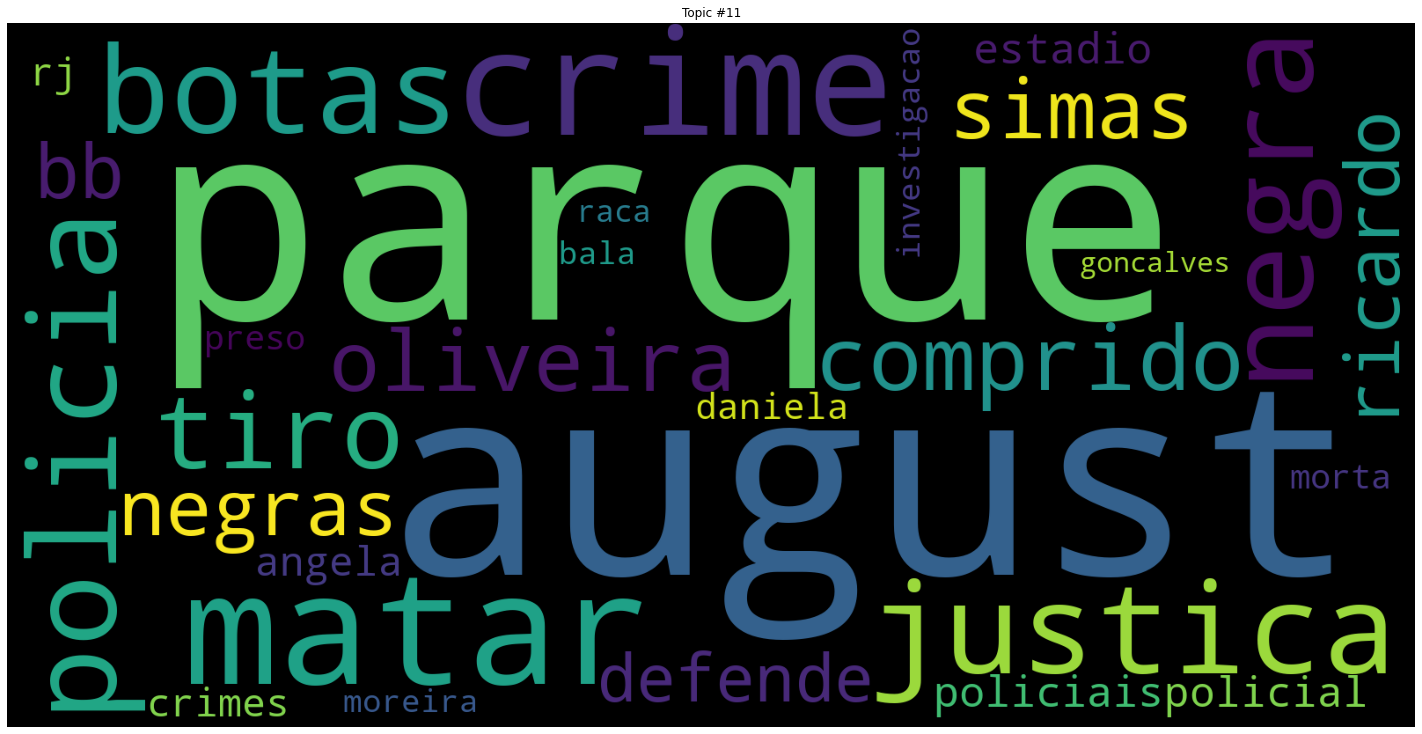

<Figure size 432x288 with 0 Axes>

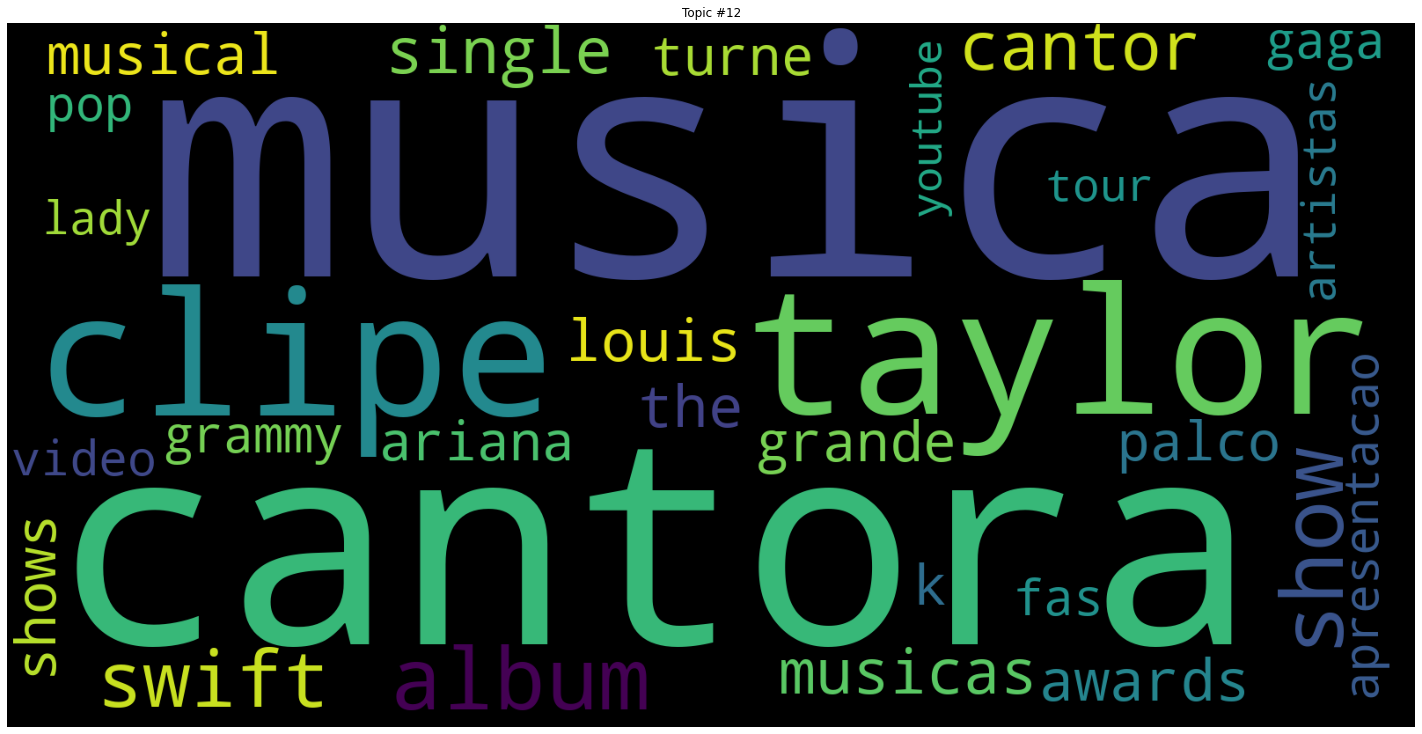

<Figure size 432x288 with 0 Axes>

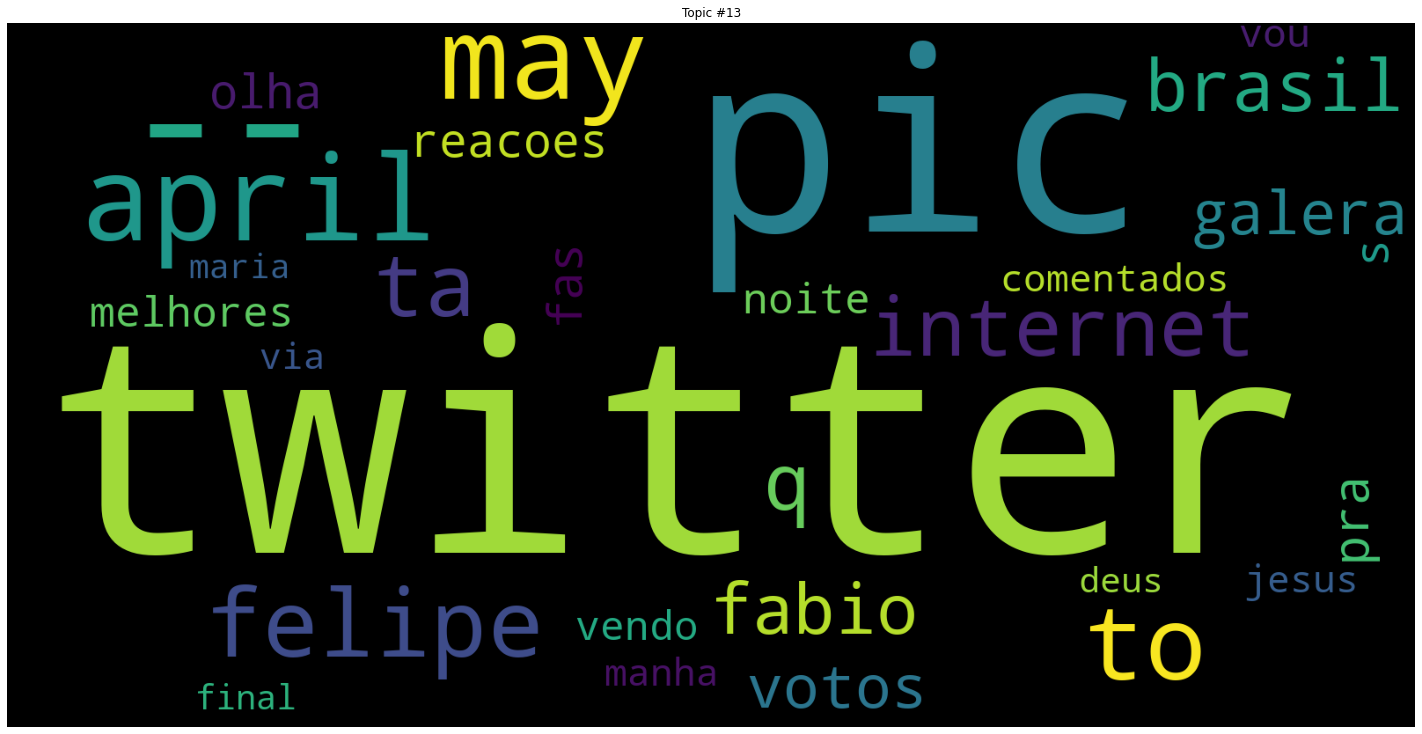

<Figure size 432x288 with 0 Axes>

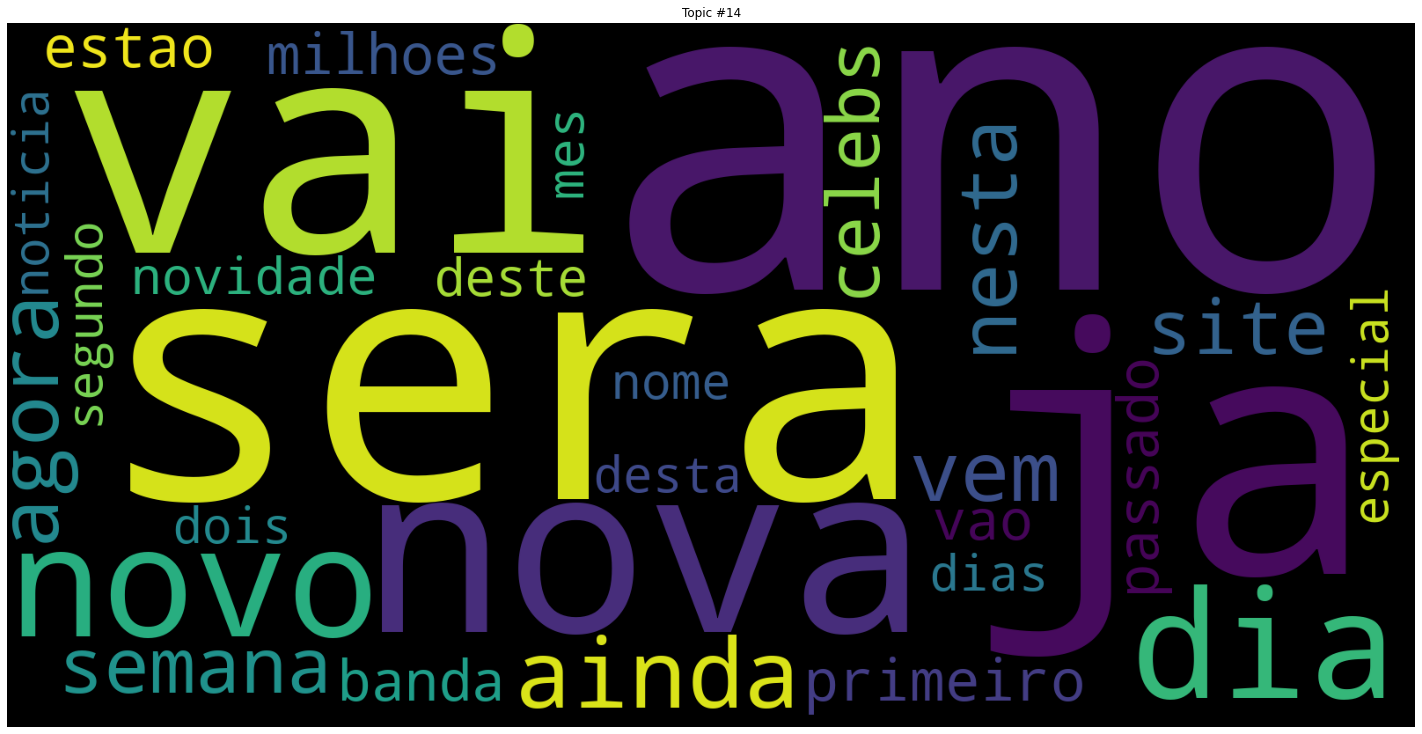

<Figure size 432x288 with 0 Axes>

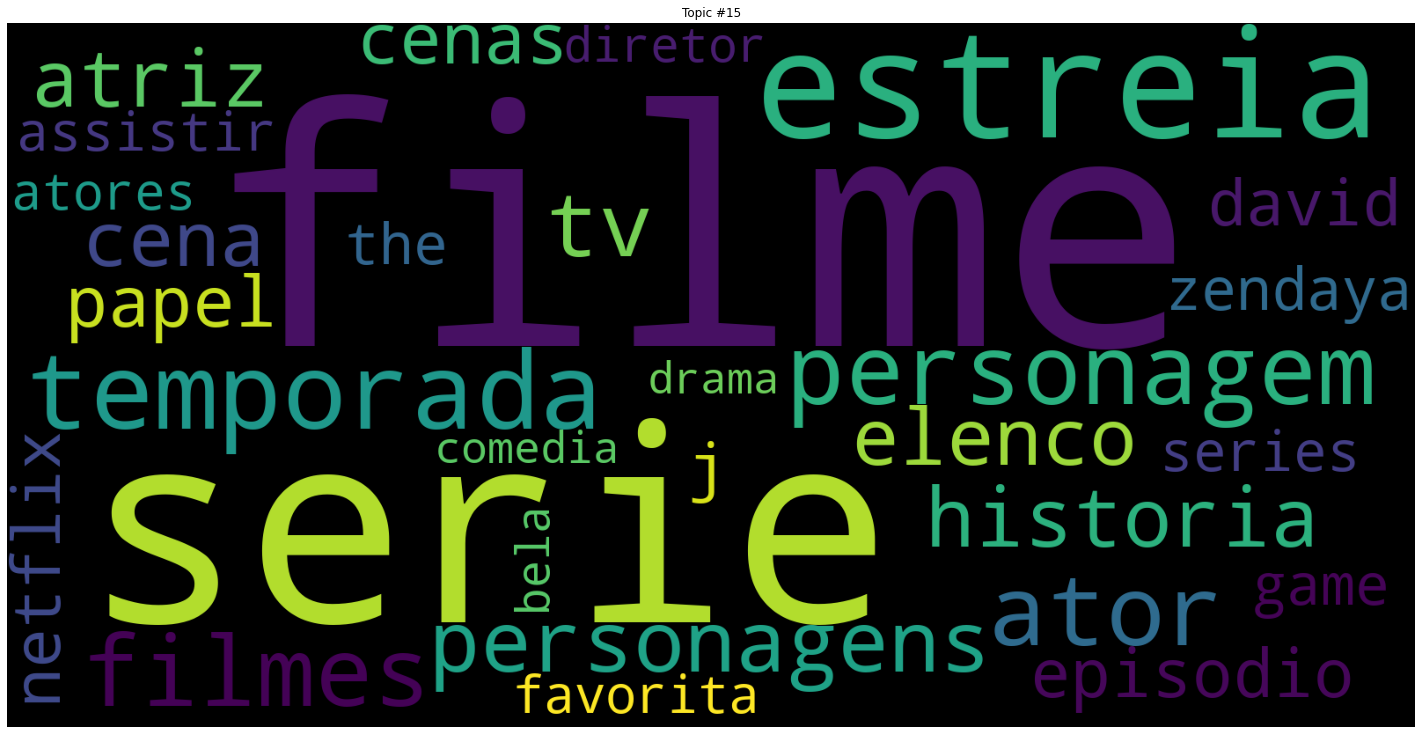

<Figure size 432x288 with 0 Axes>

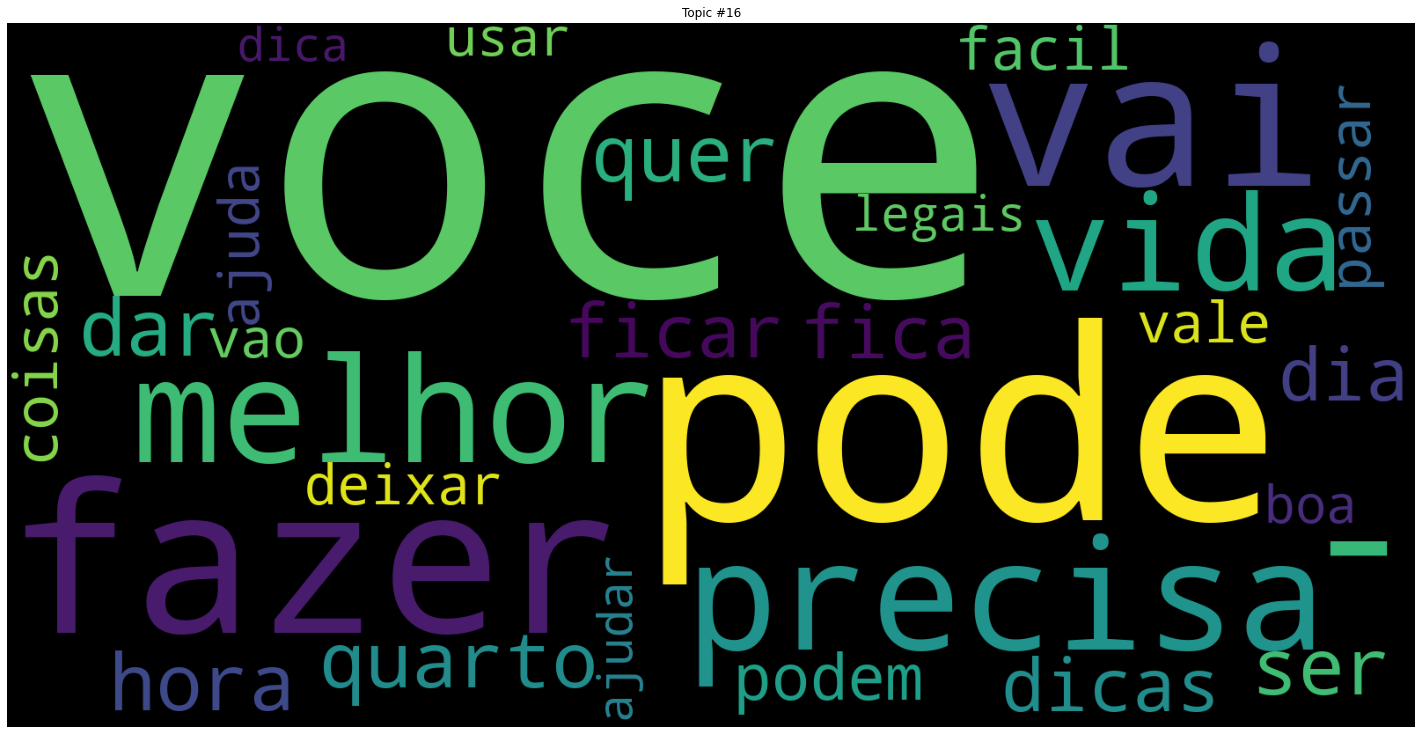

<Figure size 432x288 with 0 Axes>

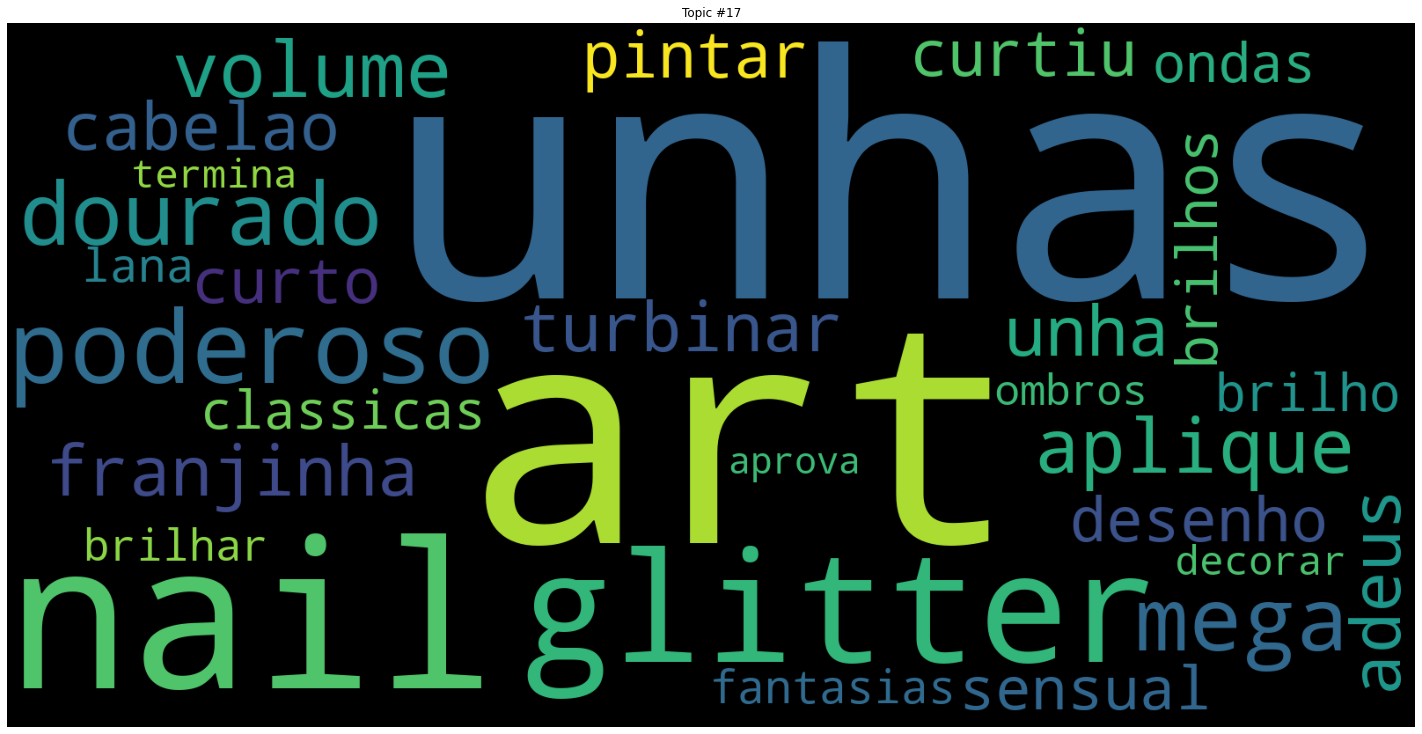

<Figure size 432x288 with 0 Axes>

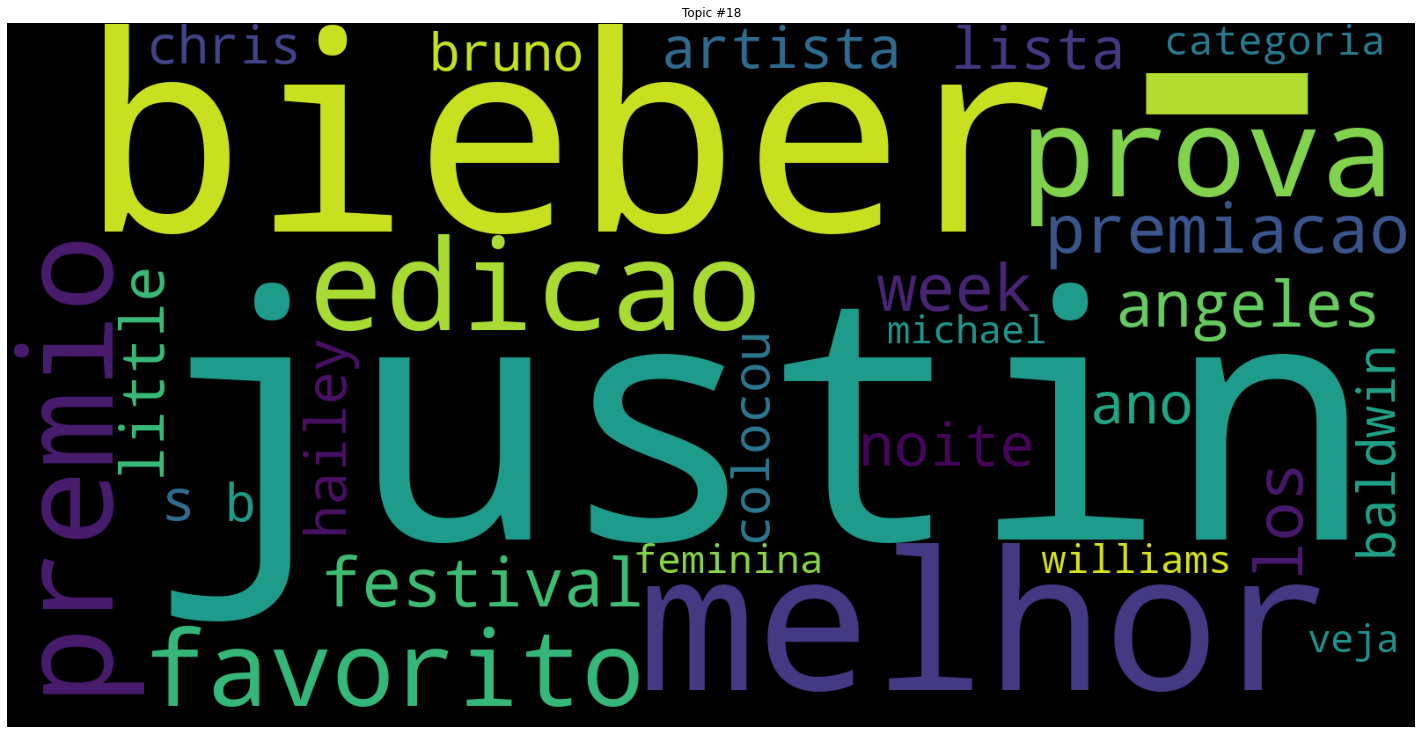

<Figure size 432x288 with 0 Axes>

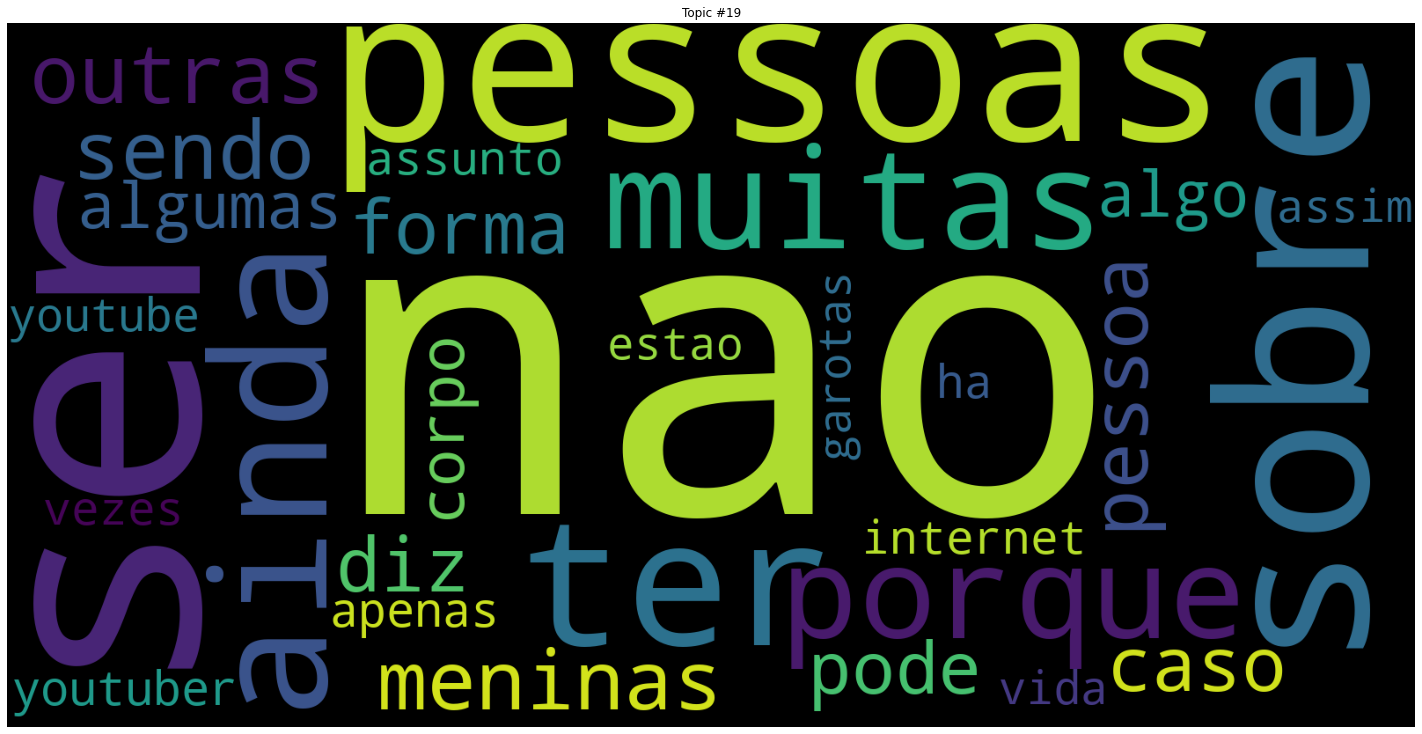

<Figure size 432x288 with 0 Axes>

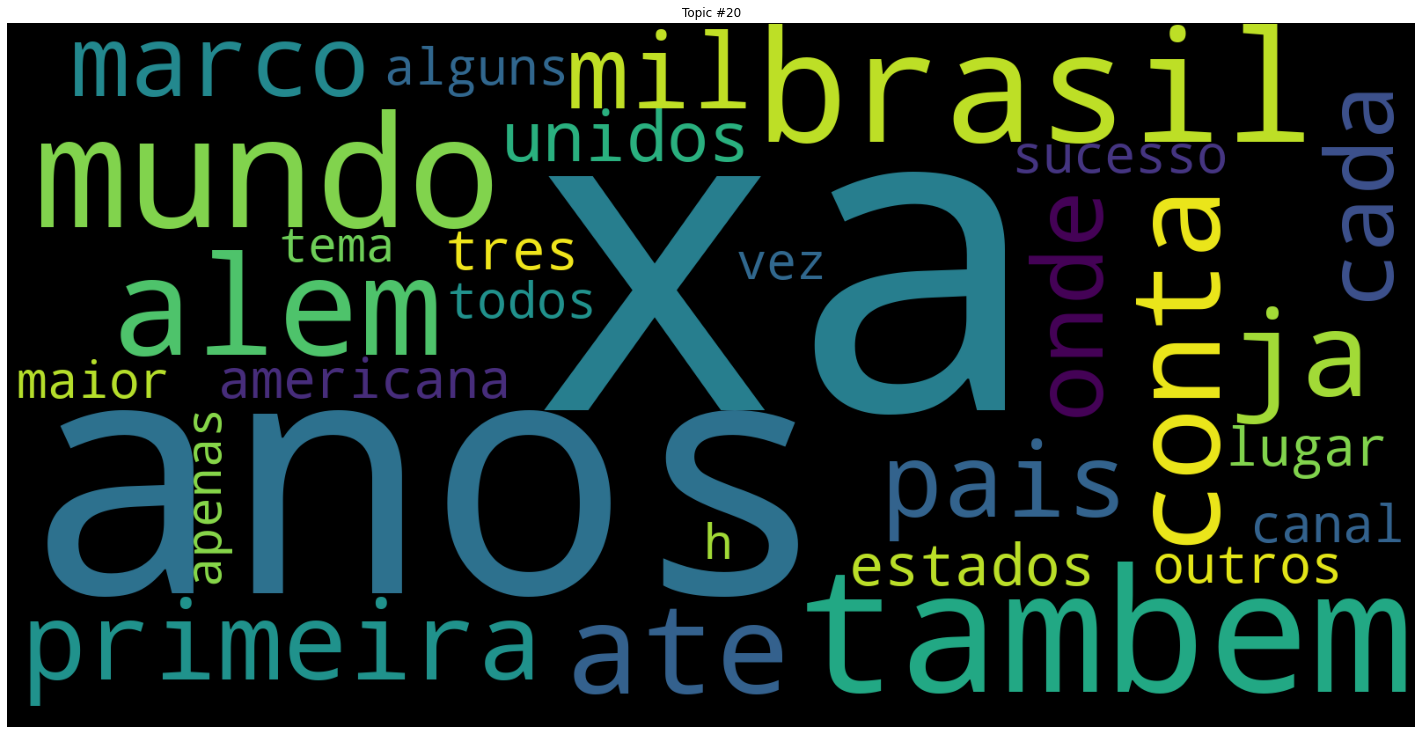

<Figure size 432x288 with 0 Axes>

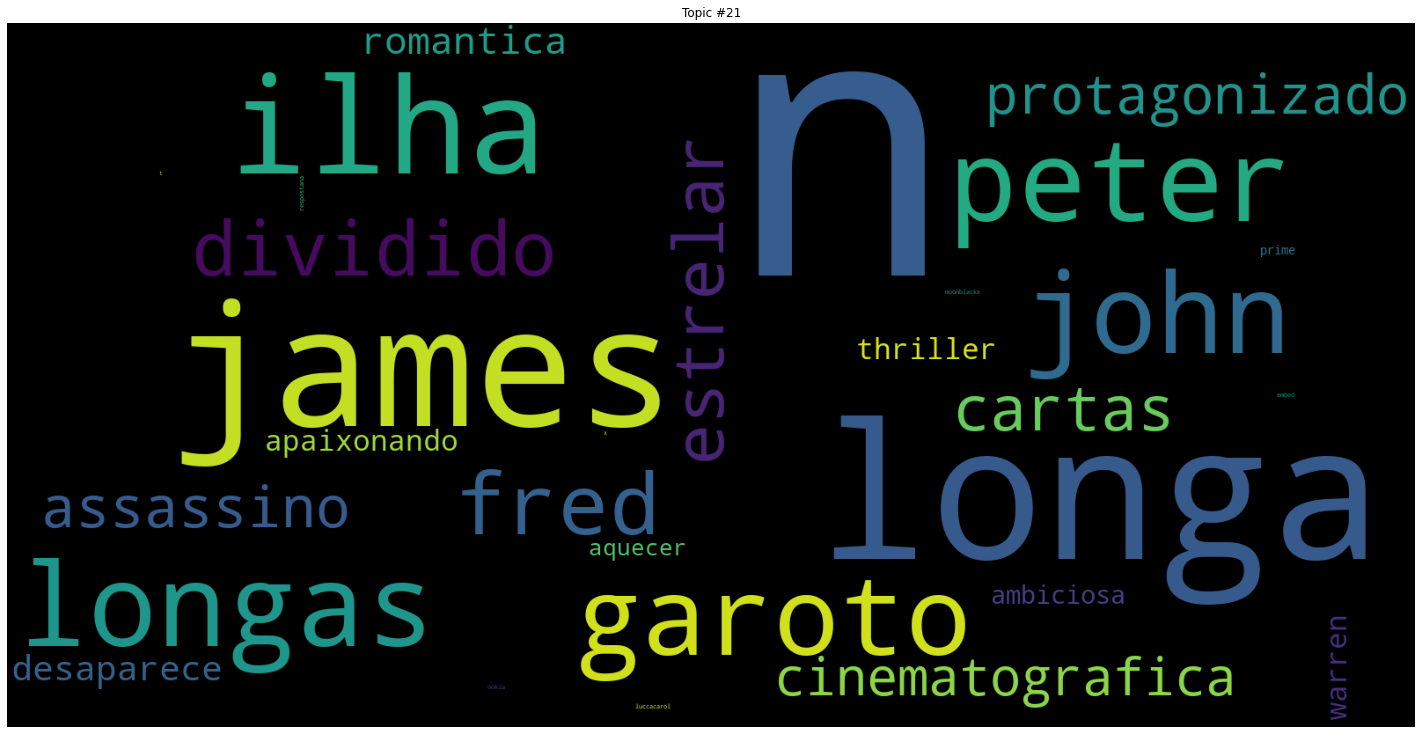

<Figure size 432x288 with 0 Axes>

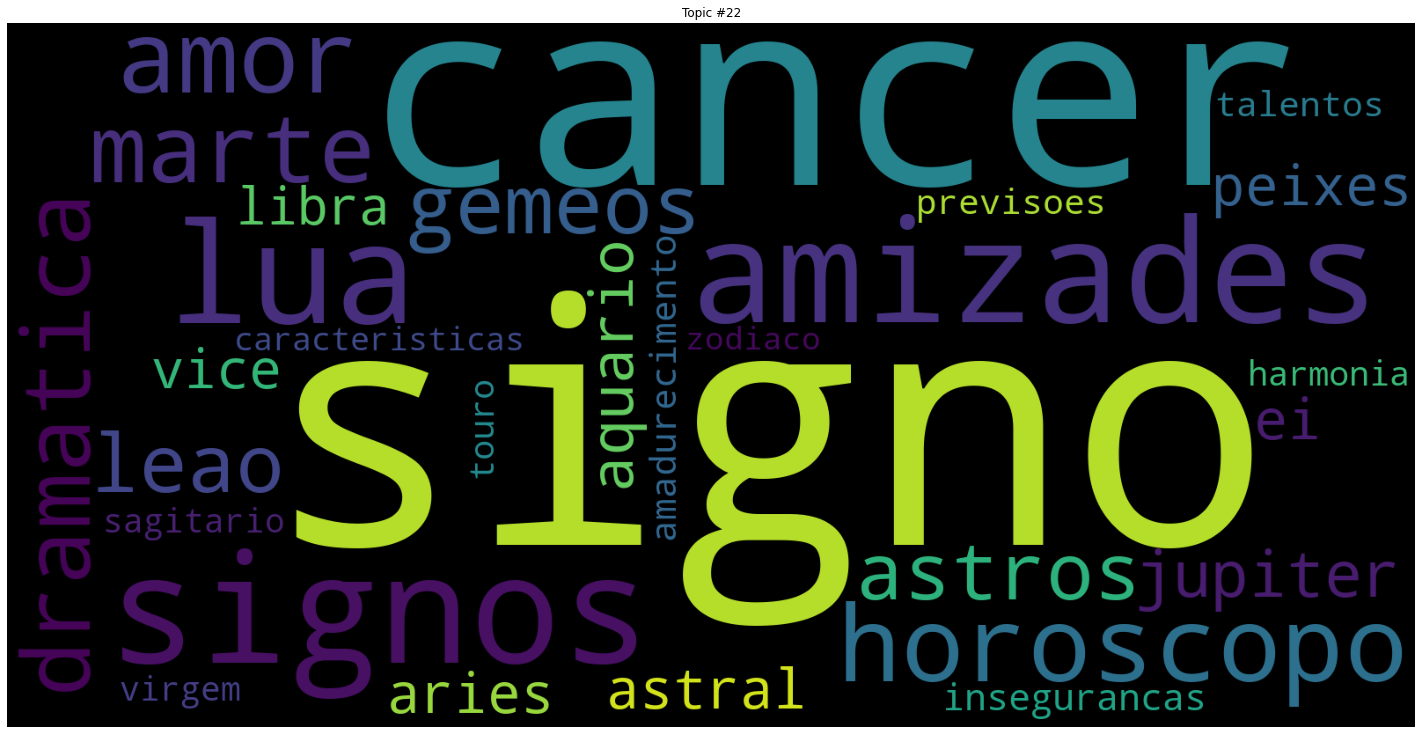

<Figure size 432x288 with 0 Axes>

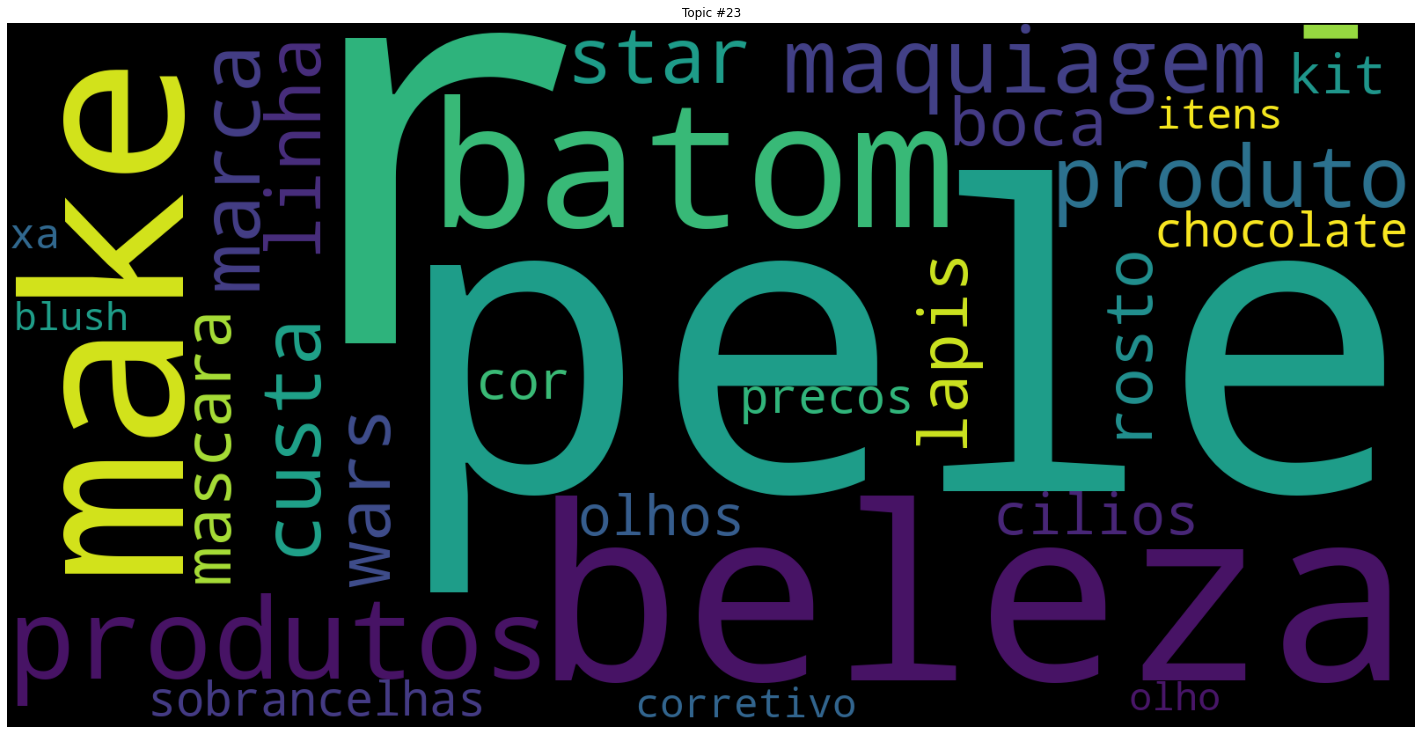

<Figure size 432x288 with 0 Axes>

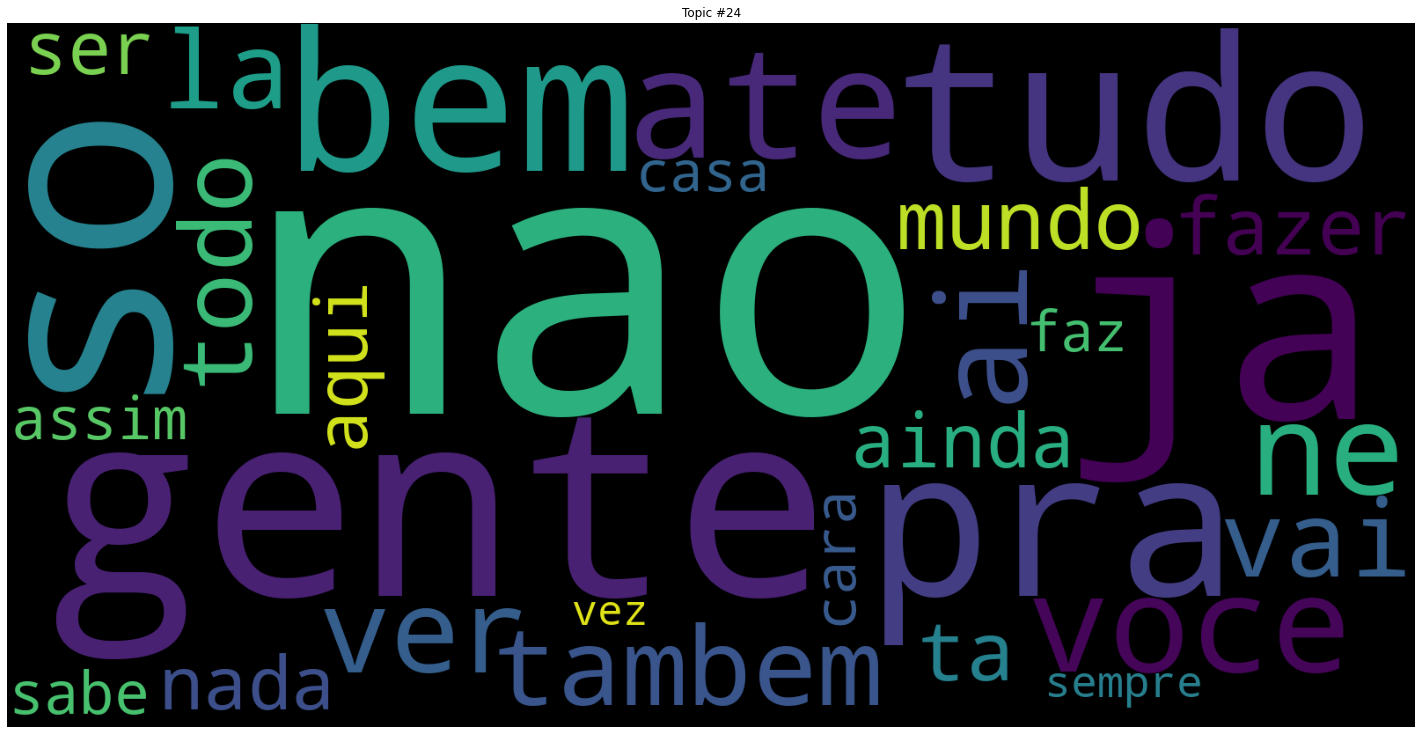

<Figure size 432x288 with 0 Axes>

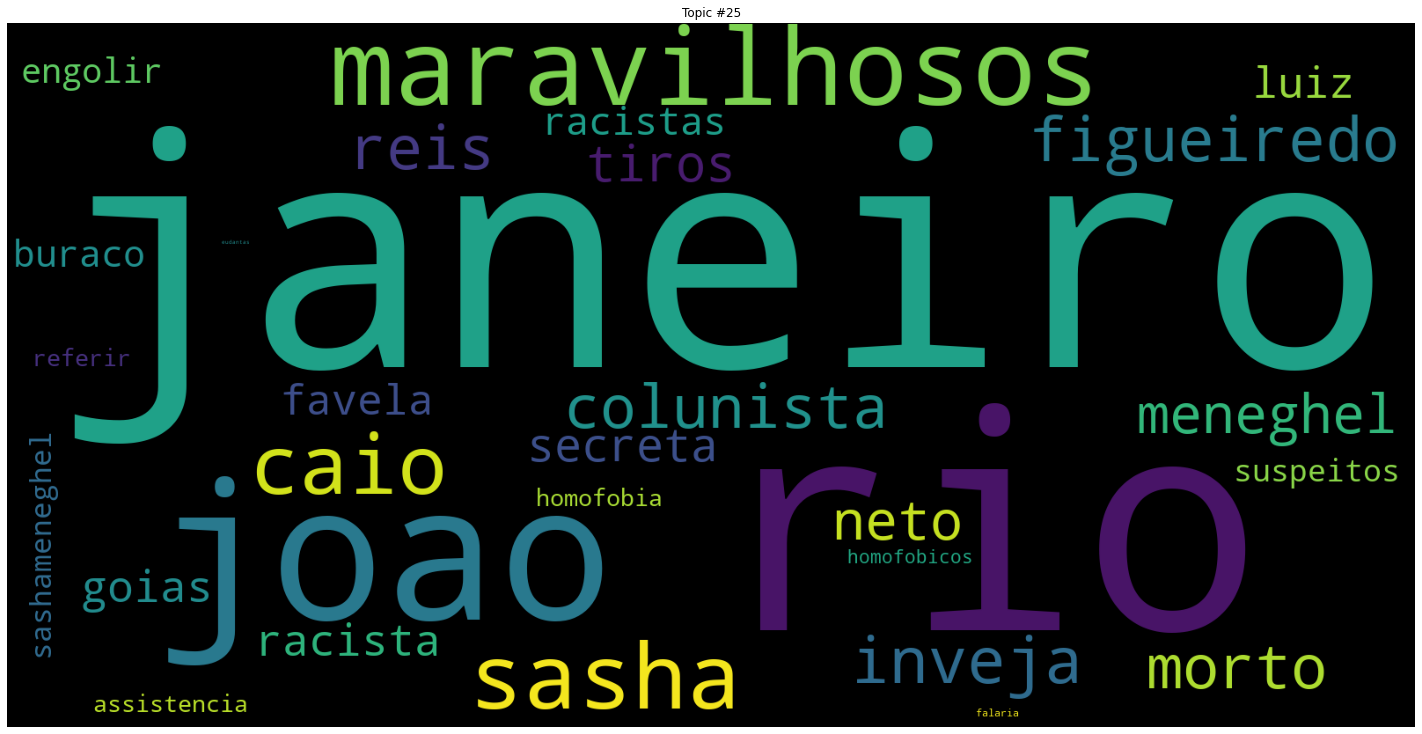

<Figure size 432x288 with 0 Axes>

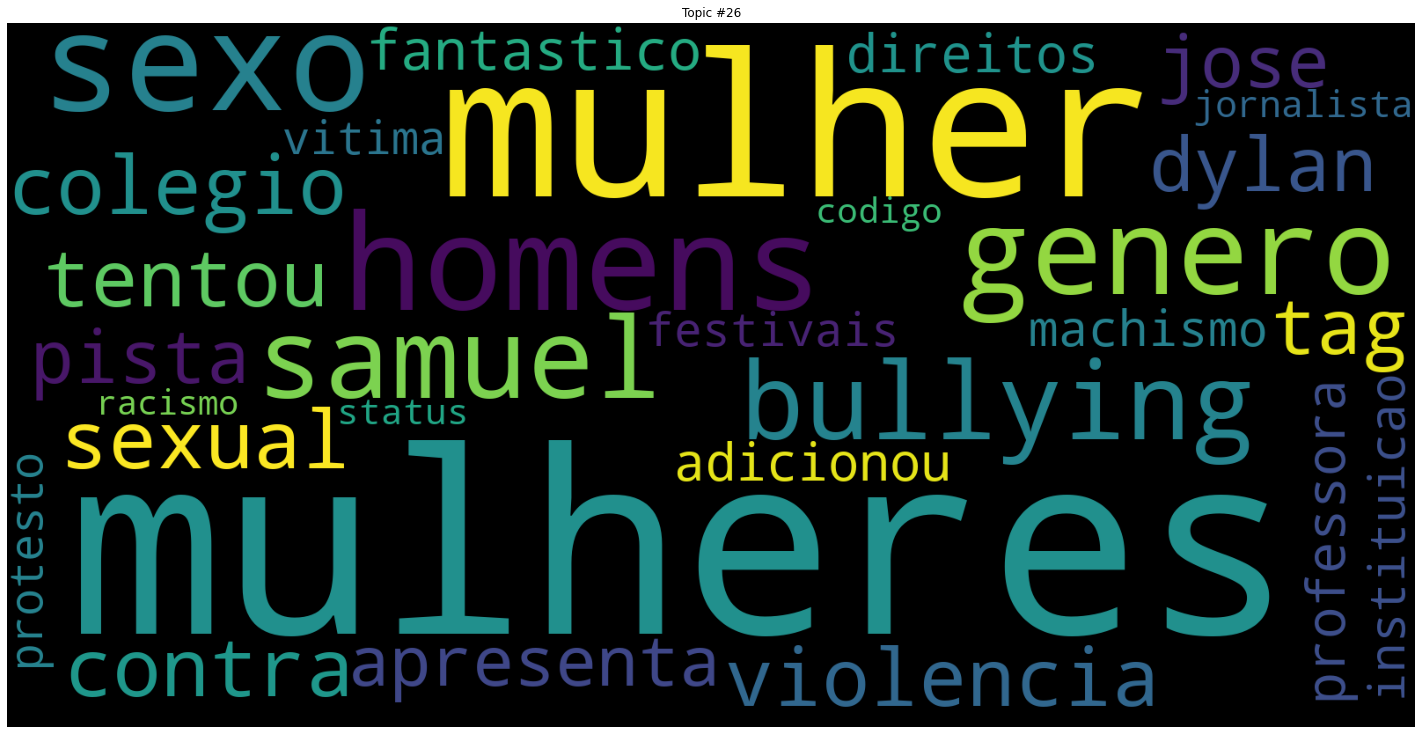

<Figure size 432x288 with 0 Axes>

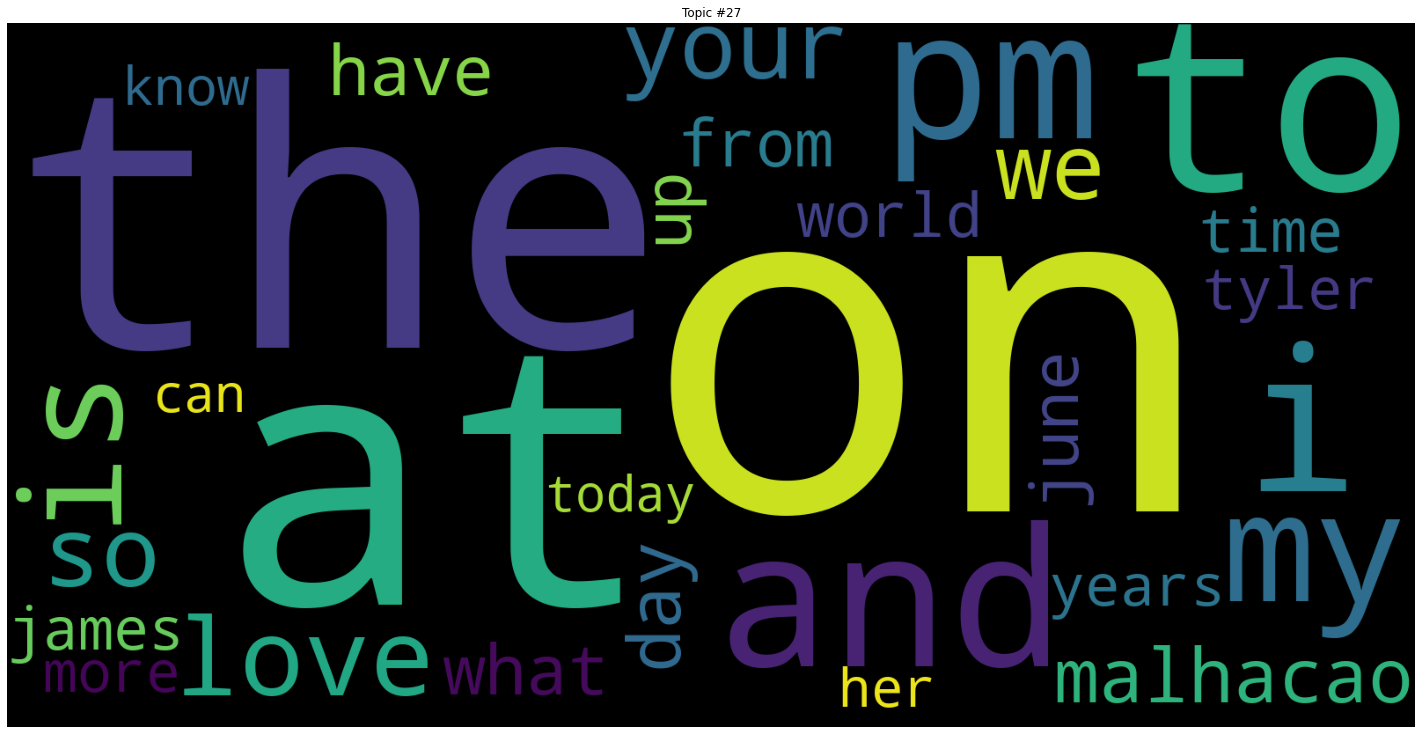

<Figure size 432x288 with 0 Axes>

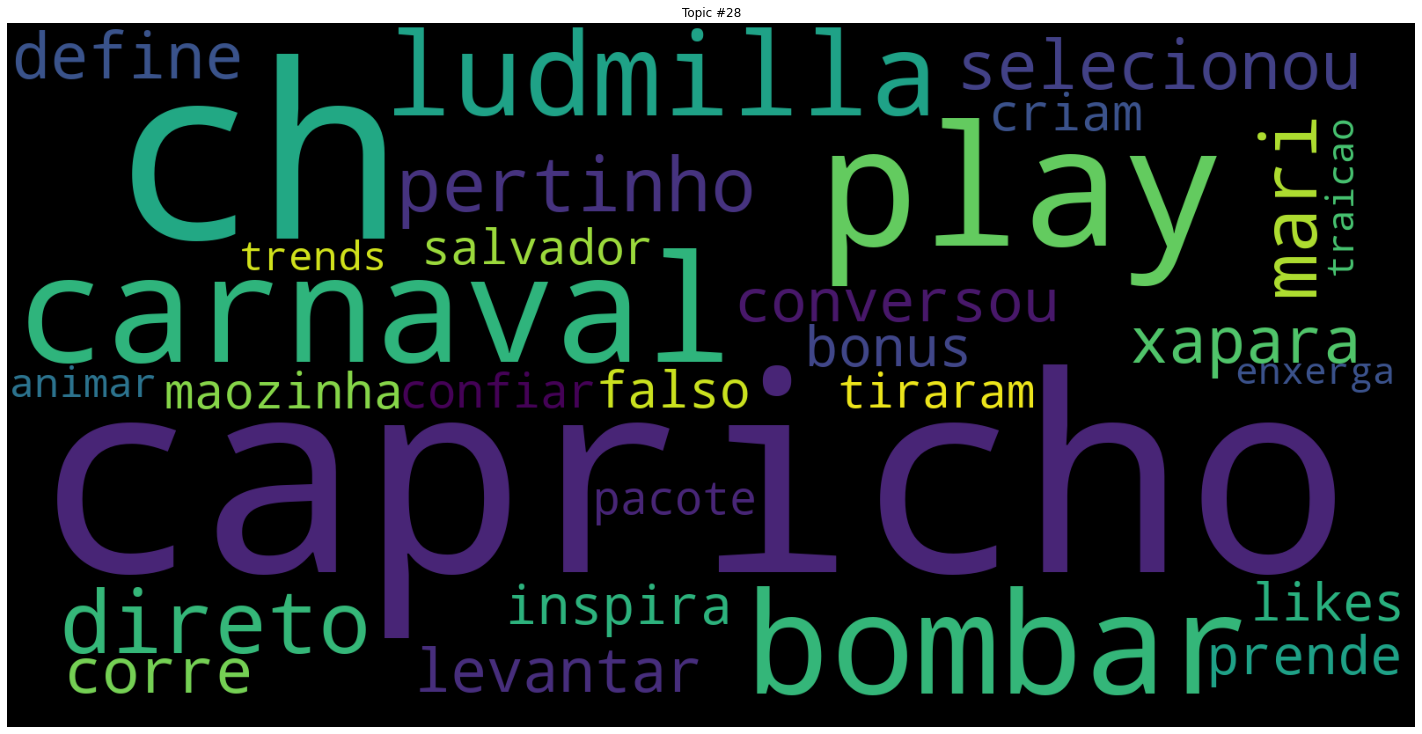

<Figure size 432x288 with 0 Axes>

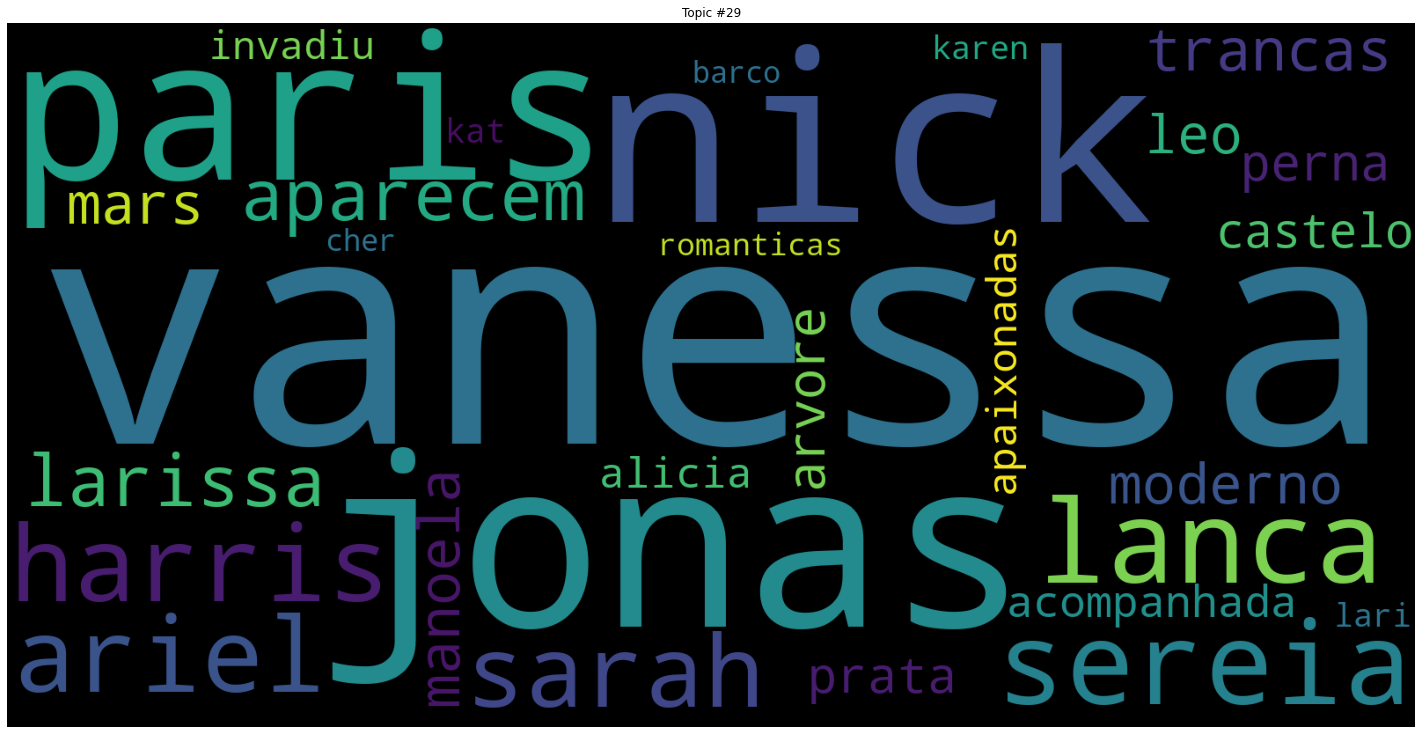

<Figure size 432x288 with 0 Axes>

In [22]:
vis('capricho_filter_full_clean')
allDone()